importing important libraries:

In [156]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy.stats import shapiro, anderson, kstest
import numpy as np
from statsmodels.stats.diagnostic import het_arch
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [126]:
data = pd.read_csv('data/daily_close.csv', index_col=[0])
X = data['HDFCBANK'] #some random time series, just for an example

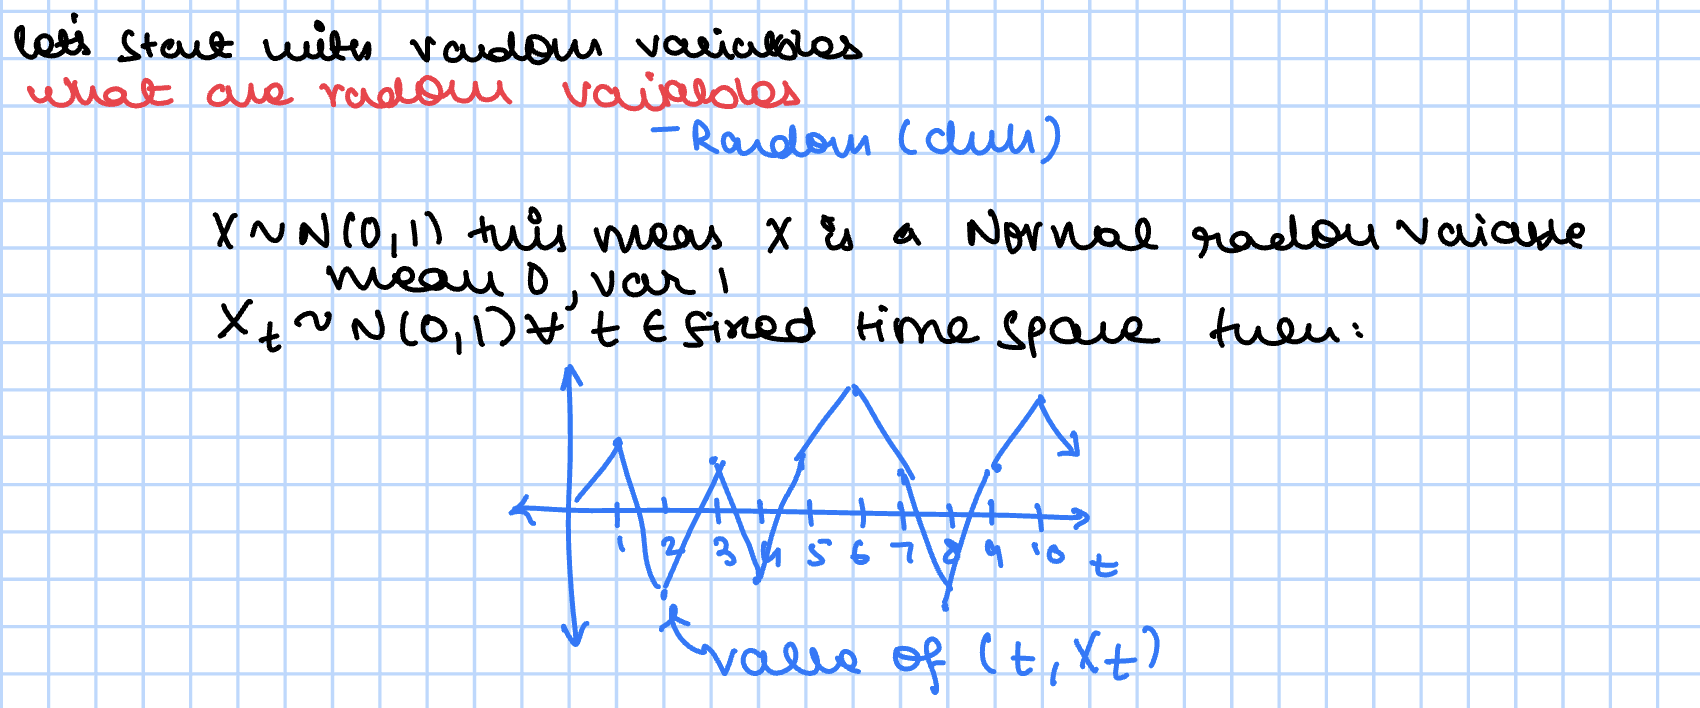

In [155]:
Image(filename='handwritten notes/intro1.png')

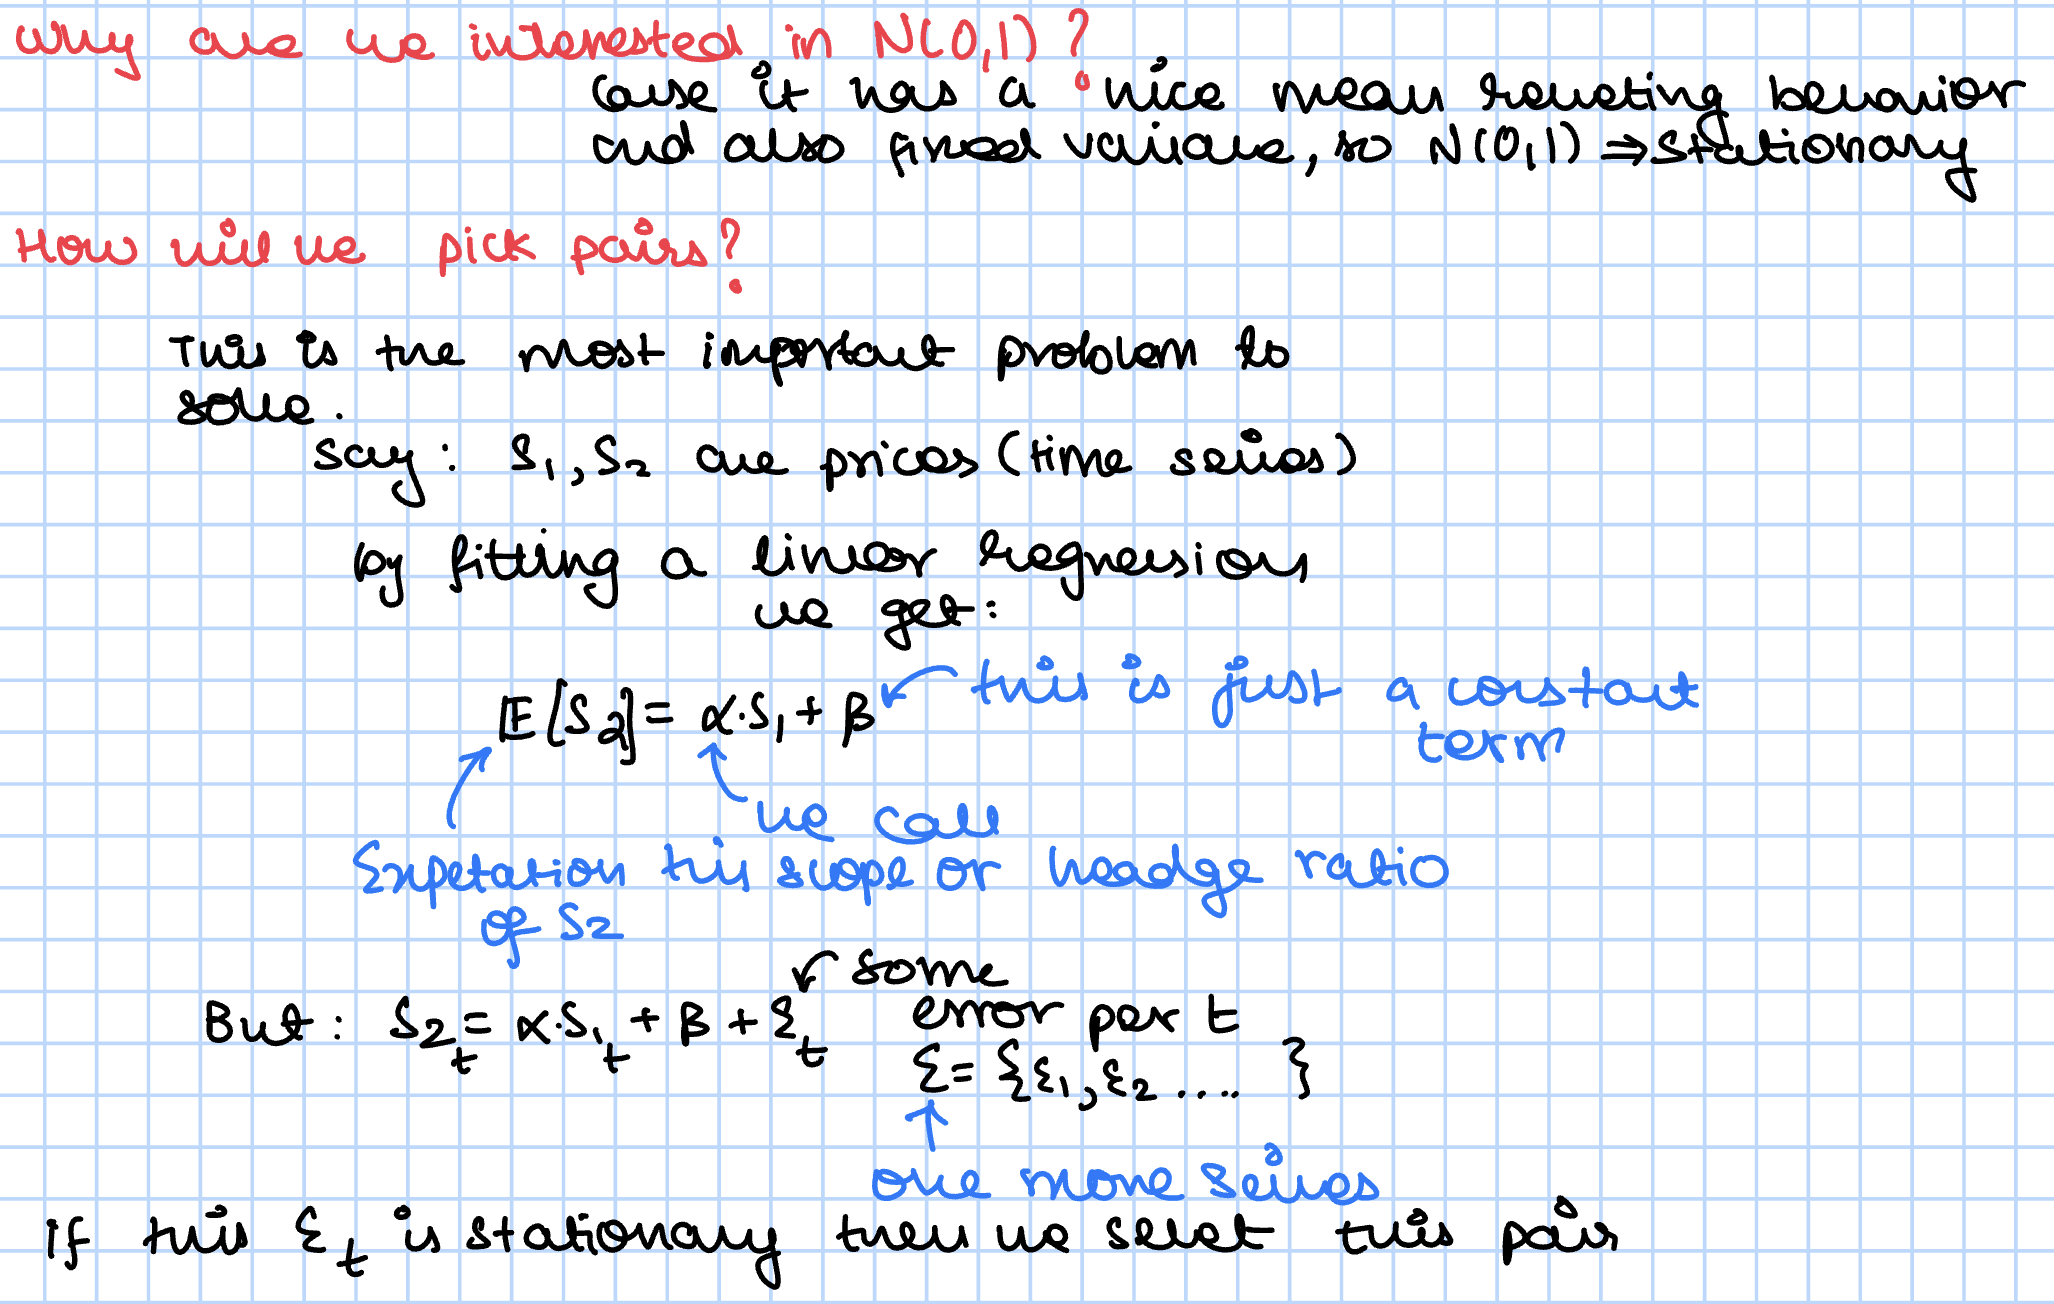

In [157]:
Image(filename='handwritten notes/intro2.png')

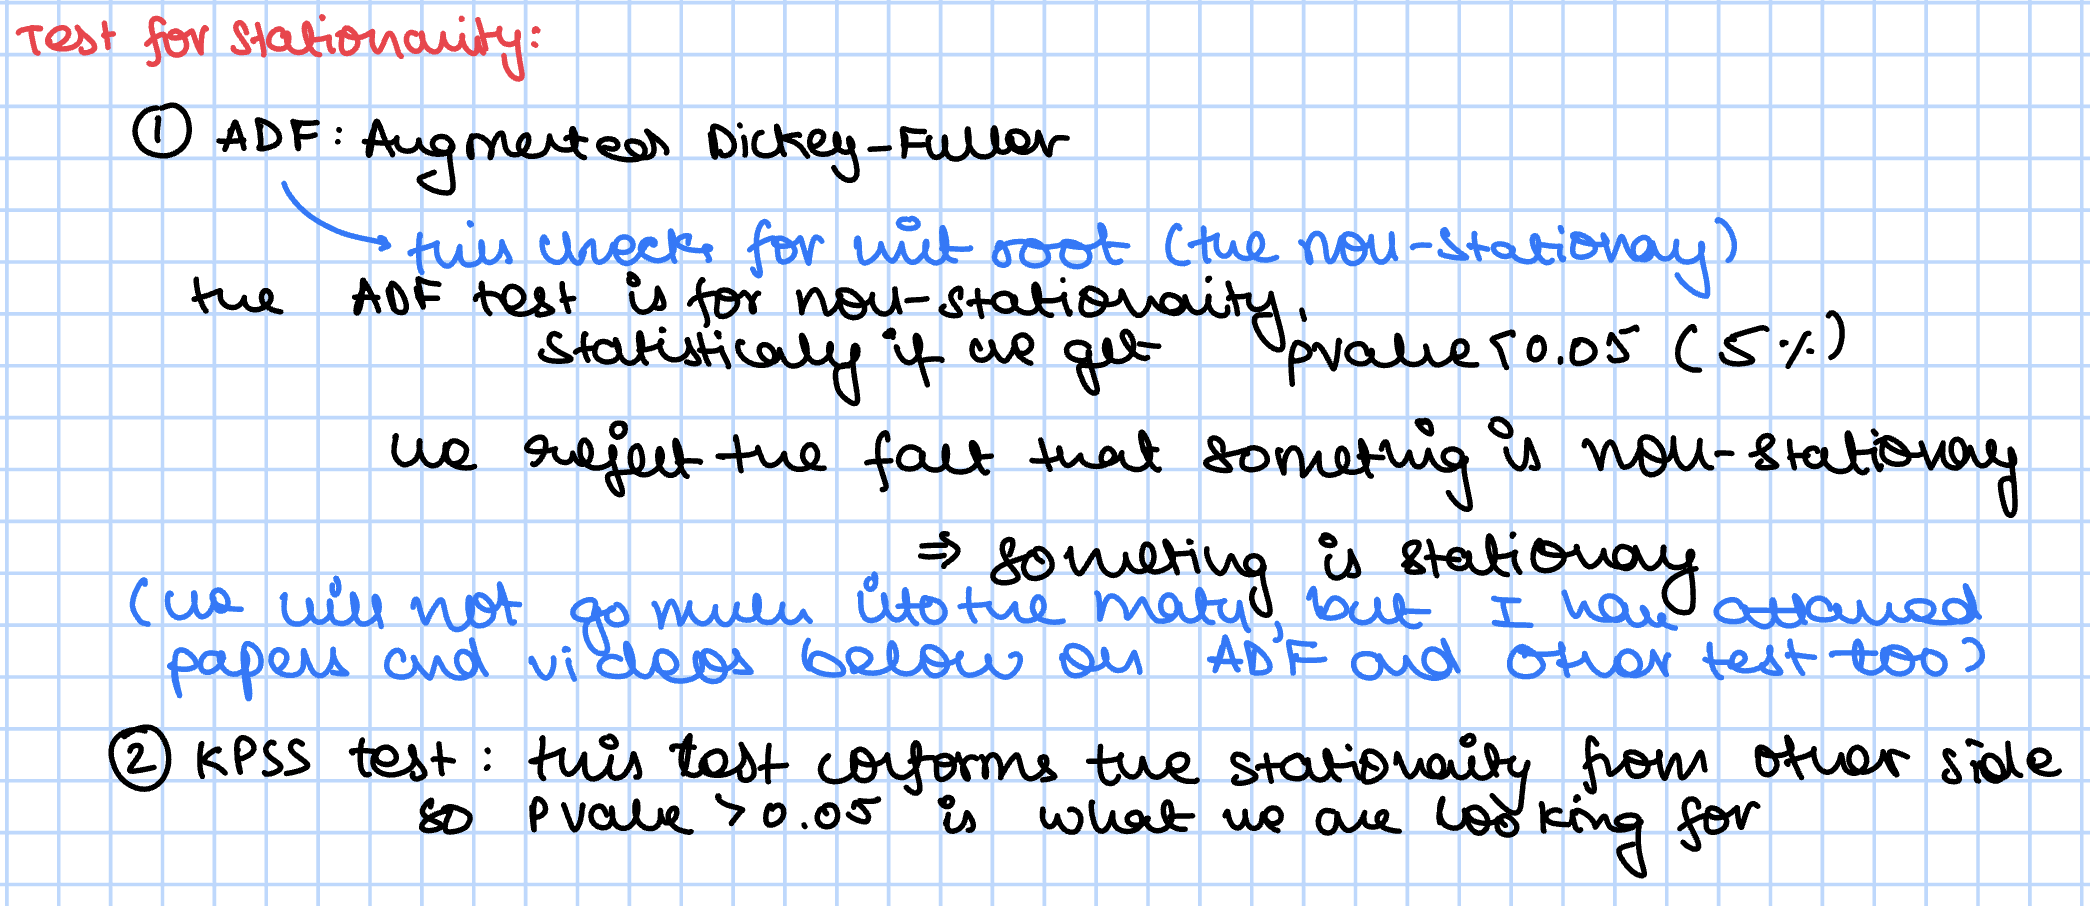

In [158]:
Image(filename='handwritten notes/intro3.png')

In [127]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("ADF p-value:", adfuller(X)[1])
    print("KPSS p-value:", kpss(X, regression='c')[1])

ADF p-value: 0.5838533381000819
KPSS p-value: 0.01


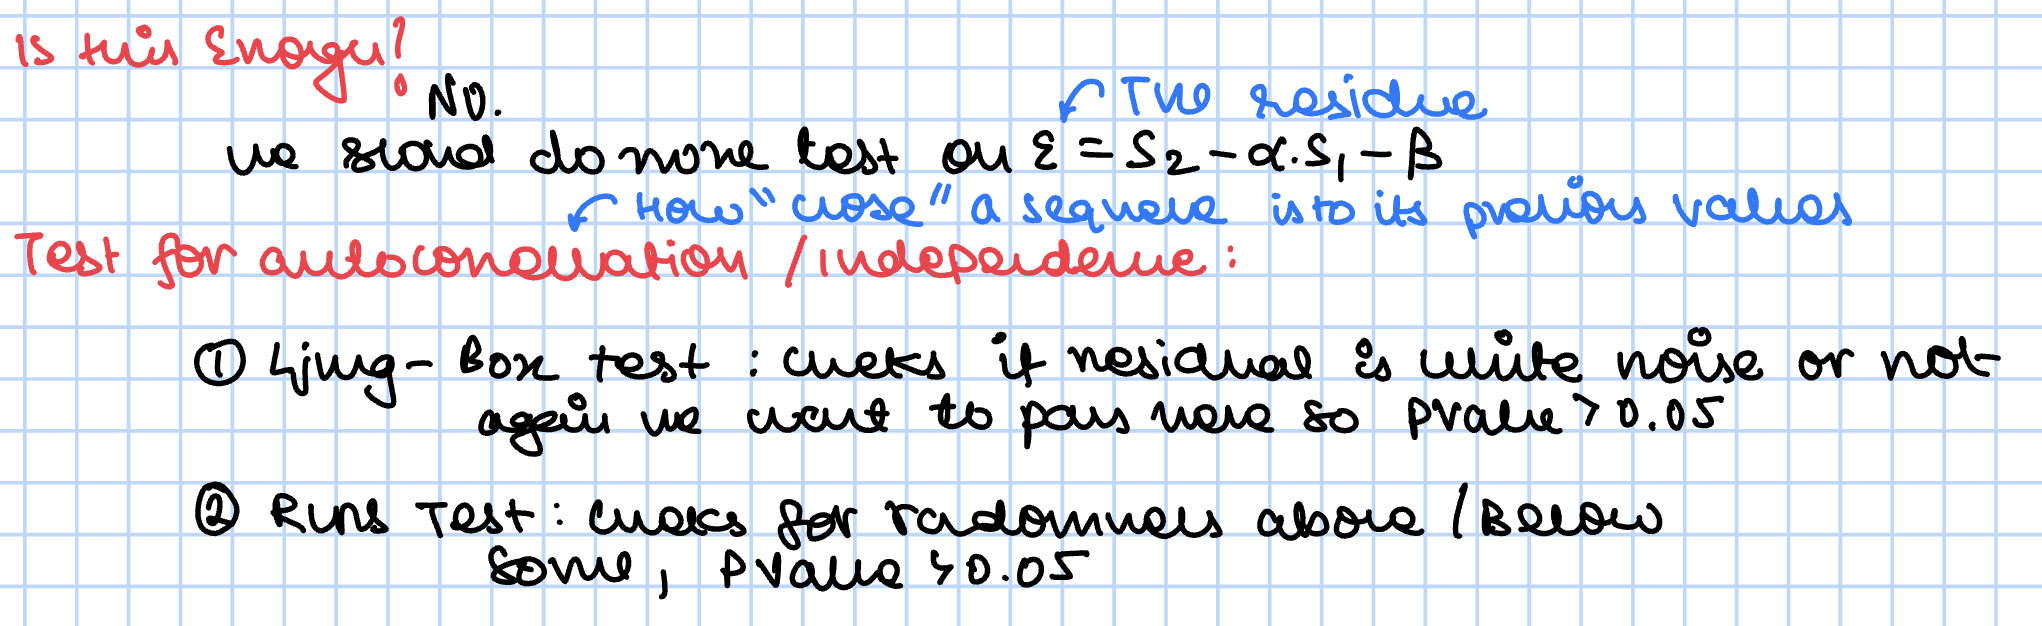

In [159]:
Image(filename='handwritten notes/intro4.png')

In [128]:
print("Ljung-Box p-value:", acorr_ljungbox(X, lags=[10], return_df=True)['lb_pvalue'].iloc[0])
print("Runs Test p-value:", runstest_1samp(X)[1])

Ljung-Box p-value: 0.0
Runs Test p-value: 5.734341803692584e-266


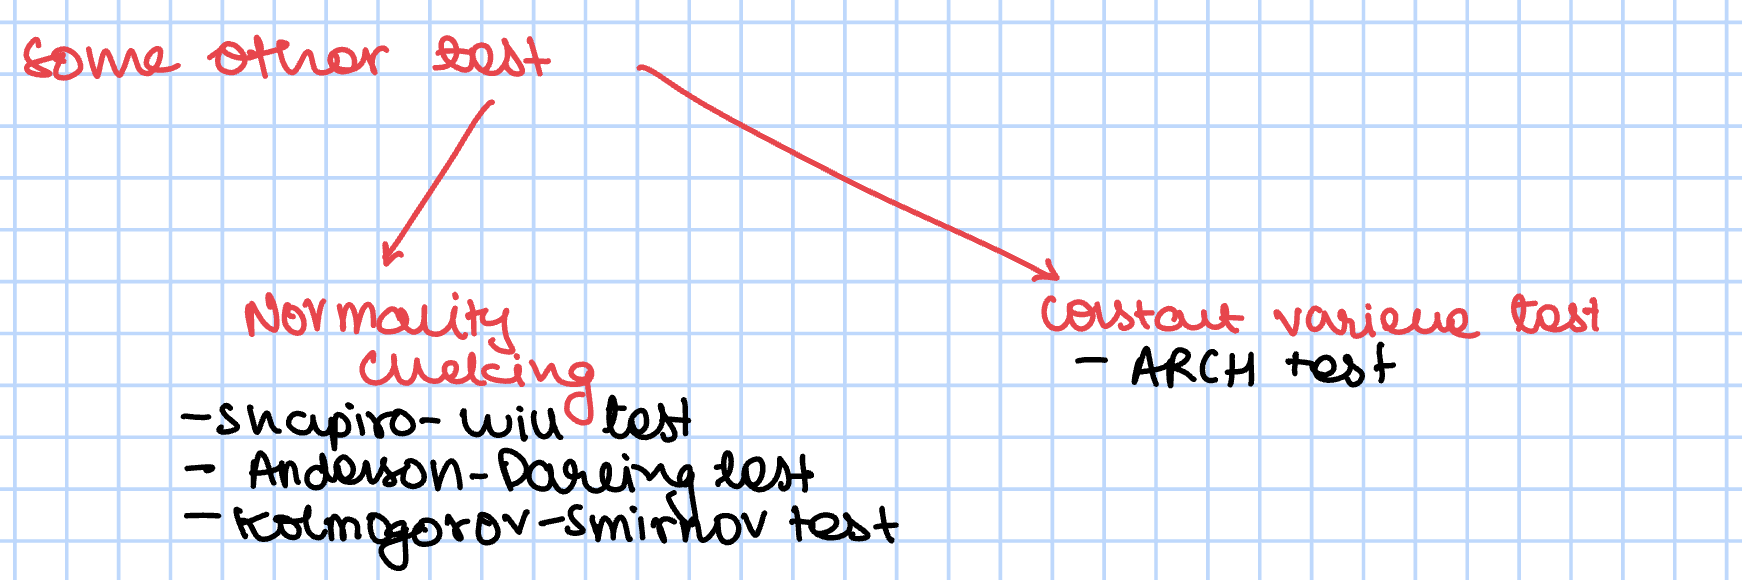

In [160]:
Image(filename='handwritten notes/intro5.png')

In [129]:
print("Shapiro p-value:", shapiro(X)[1])
print("Anderson p-value:", anderson(X, dist='norm').significance_level[0])
mu, sigma = np.mean(X), np.std(X)
print("K-S p-value:", kstest((X - mu)/sigma, 'norm')[1])

Shapiro p-value: 2.4550930606901267e-21
Anderson p-value: 15.0
K-S p-value: 3.062135942541275e-12


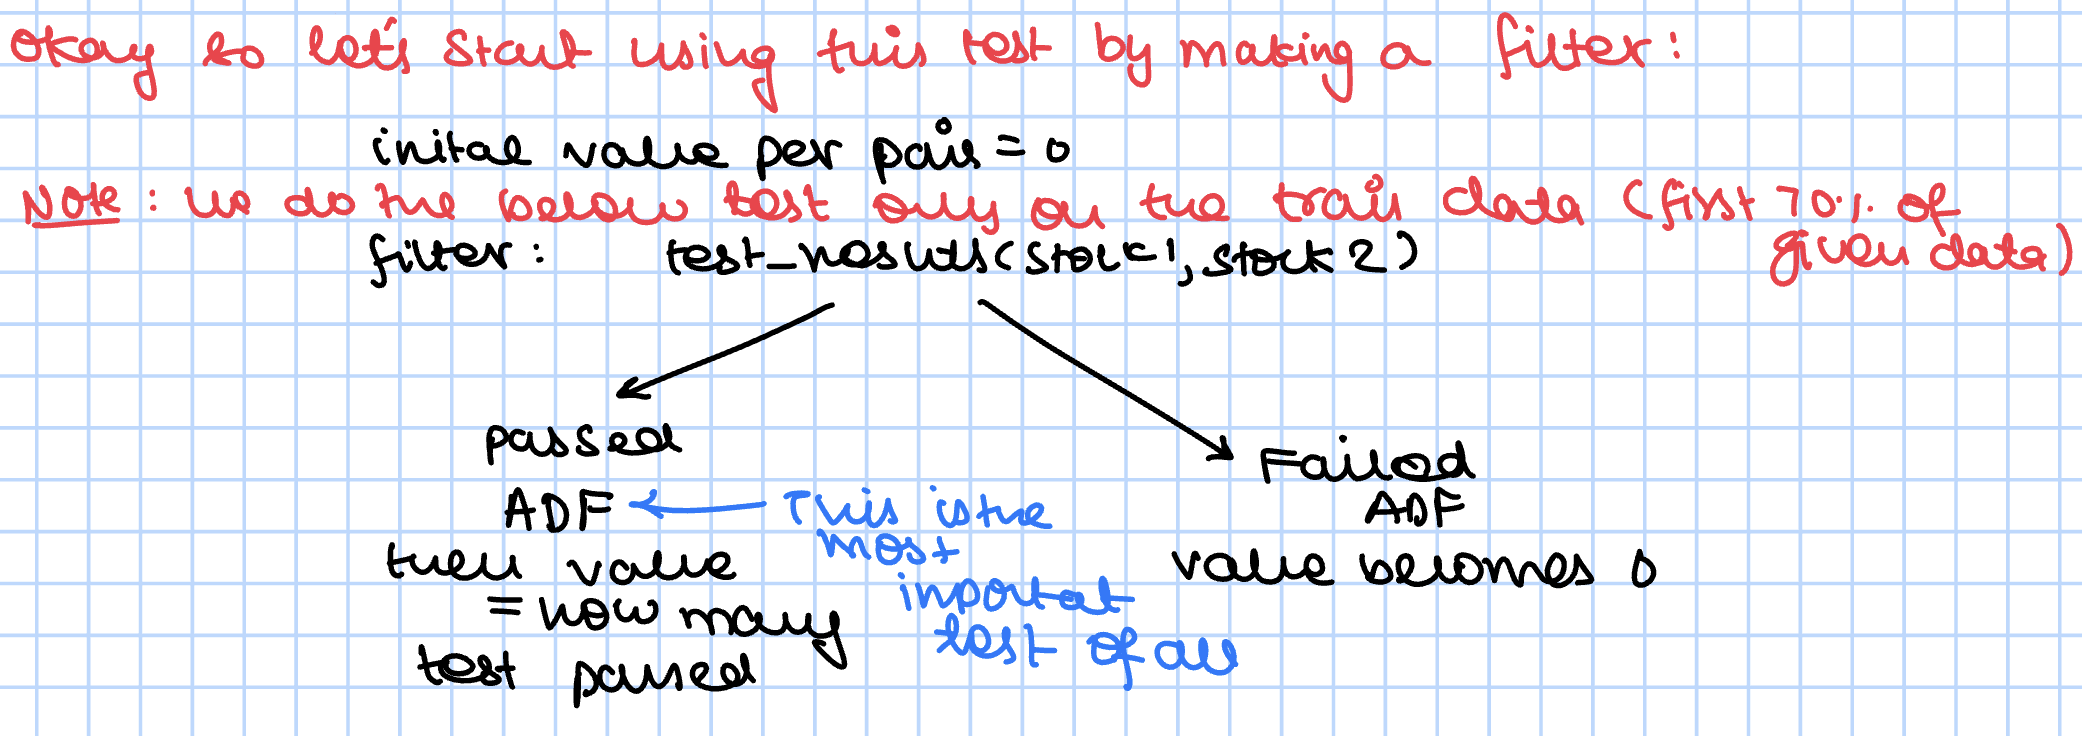

In [161]:
Image(filename='handwritten notes/intro6.png')

In [130]:
def return_metric_given_spread(spread_X):
    X = spread_X
    p_values = []
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        p_values.append(("ADF", adfuller(X)[1], adfuller(X)[1] < 0.05))
        p_values.append(("KPSS", kpss(X, regression='c')[1], kpss(X, regression='c')[1] > 0.05))
        p_values.append(("Ljung-Box", acorr_ljungbox(X, lags=[10], return_df=True)['lb_pvalue'].iloc[0], acorr_ljungbox(X, lags=[10], return_df=True)['lb_pvalue'].iloc[0] > 0.05))
        p_values.append(("Runs Test", runstest_1samp(X)[1], runstest_1samp(X)[1] > 0.05))
        p_values.append(("Shapiro", shapiro(X)[1], shapiro(X)[1] > 0.05))
        p_values.append(("Anderson", anderson(X, dist='norm').significance_level[0], anderson(X, dist='norm').significance_level[0] > 0.05))
        mu, sigma = np.mean(X), np.std(X)
        p_values.append(("K-S", kstest((X - mu)/sigma, 'norm')[1], kstest((X - mu)/sigma, 'norm')[1] > 0.05))
        p_values.append(("ARCH Test", het_arch(X)[1], het_arch(X)[1] > 0.05))
    return p_values

In [131]:
def return_metric(ticker1, ticker2):
    S1 = data[:int(len(data)*0.7)][ticker1]
    S2 = data[:int(len(data)*0.7)][ticker2]
    X = sm.add_constant(S2)
    model = sm.OLS(S1, X).fit()
    spread_X = model.resid
    return return_metric_given_spread(spread_X)

In [132]:
def value(ticker1, ticker2):
    passes = 0;
    matrix = return_metric(ticker1, ticker2)
    for _, _, result in matrix:
        if matrix[0][2] == True:
            if result == True:
                passes+=1
    return passes

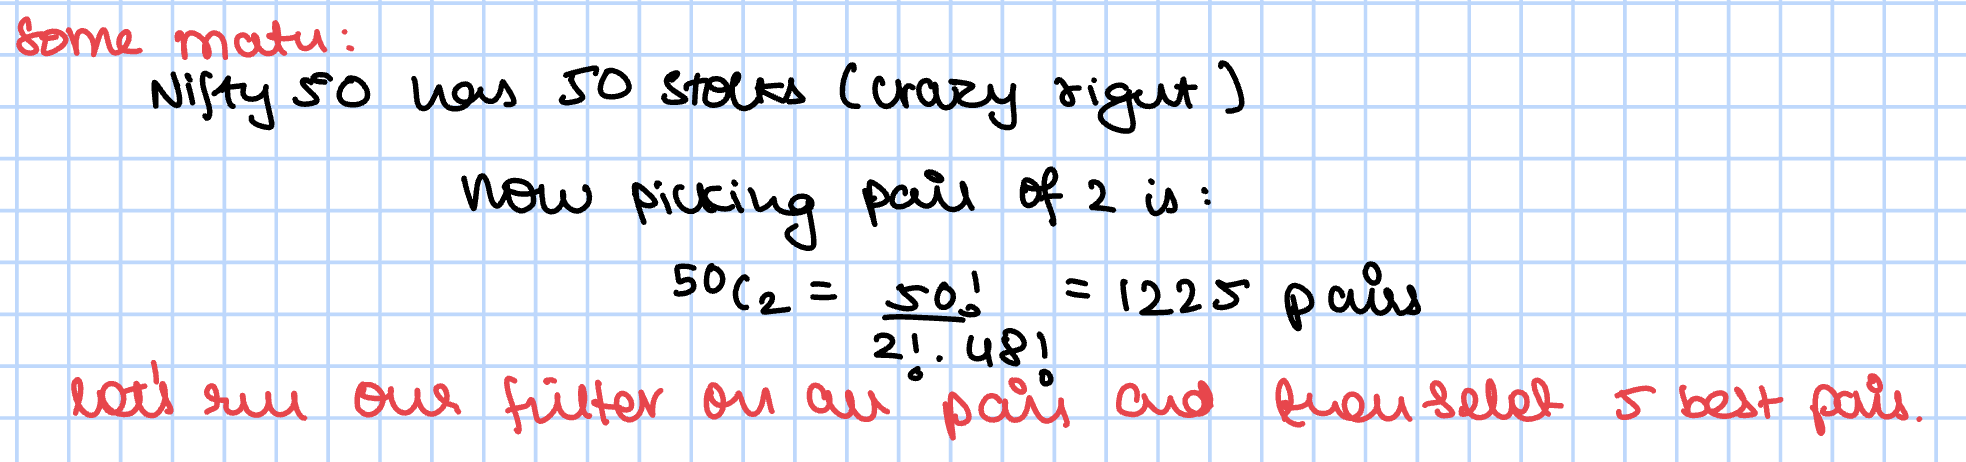

In [162]:
Image(filename='handwritten notes/intro7.png')

In [133]:
stock_pairs = list(combinations(data.columns, 2))
n = len(data.columns)
print(f"50C2 = {int(n*(n-1)/2)}")
print(f"total stock pairs using combinations = {len(stock_pairs)}")

50C2 = 1225
total stock pairs using combinations = 1225


In [134]:
value_matrix = pd.DataFrame(np.zeros((50, 50), dtype=int), columns=data.columns, index=data.columns)
list_of_pairs = []
for stock1, stock2 in tqdm.tqdm(stock_pairs):
    value_matrix.loc[stock1, stock2] = value(stock1, stock2)
    value_matrix.loc[stock2, stock1] = value_matrix.loc[stock1, stock2]
    if value_matrix.loc[stock1, stock2] > 0:
        list_of_pairs.append((stock1, stock2, value_matrix.loc[stock1, stock2]))

100%|██████████| 1225/1225 [00:55<00:00, 22.16it/s]


In [135]:
print([pair for pair in sorted(list_of_pairs, key=lambda x: x[2], reverse=True) if pair[2] >= 0])

[('ADANIPORTS', 'GRASIM', 4), ('ADANIPORTS', 'TATACONSUM', 4), ('ASIANPAINT', 'GRASIM', 4), ('ASIANPAINT', 'TATACONSUM', 4), ('BAJFINANCE', 'GRASIM', 4), ('BAJFINANCE', 'HINDALCO', 4), ('BAJFINANCE', 'TATAMOTORS', 4), ('BPCL', 'POWERGRID', 4), ('BHARTIARTL', 'POWERGRID', 4), ('BHARTIARTL', 'SUNPHARMA', 4), ('BHARTIARTL', 'TITAN', 4), ('EICHERMOT', 'ICICIBANK', 4), ('EICHERMOT', 'M&M', 4), ('HCLTECH', 'TATACONSUM', 4), ('HDFCBANK', 'JSWSTEEL', 4), ('HINDUNILVR', 'LT', 4), ('HINDUNILVR', 'NESTLEIND', 4), ('HINDUNILVR', 'TATAMOTORS', 4), ('HINDUNILVR', 'ULTRACEMCO', 4), ('NESTLEIND', 'SUNPHARMA', 4), ('SBILIFE', 'SBIN', 4), ('TCS', 'TATACONSUM', 4), ('ADANIPORTS', 'APOLLOHOSP', 3), ('ADANIPORTS', 'ASIANPAINT', 3), ('ADANIPORTS', 'BAJFINANCE', 3), ('ADANIPORTS', 'CIPLA', 3), ('ADANIPORTS', 'HINDALCO', 3), ('ADANIPORTS', 'JSWSTEEL', 3), ('APOLLOHOSP', 'GRASIM', 3), ('APOLLOHOSP', 'HINDALCO', 3), ('APOLLOHOSP', 'JSWSTEEL', 3), ('APOLLOHOSP', 'LTIM', 3), ('APOLLOHOSP', 'TCS', 3), ('ASIANPAINT

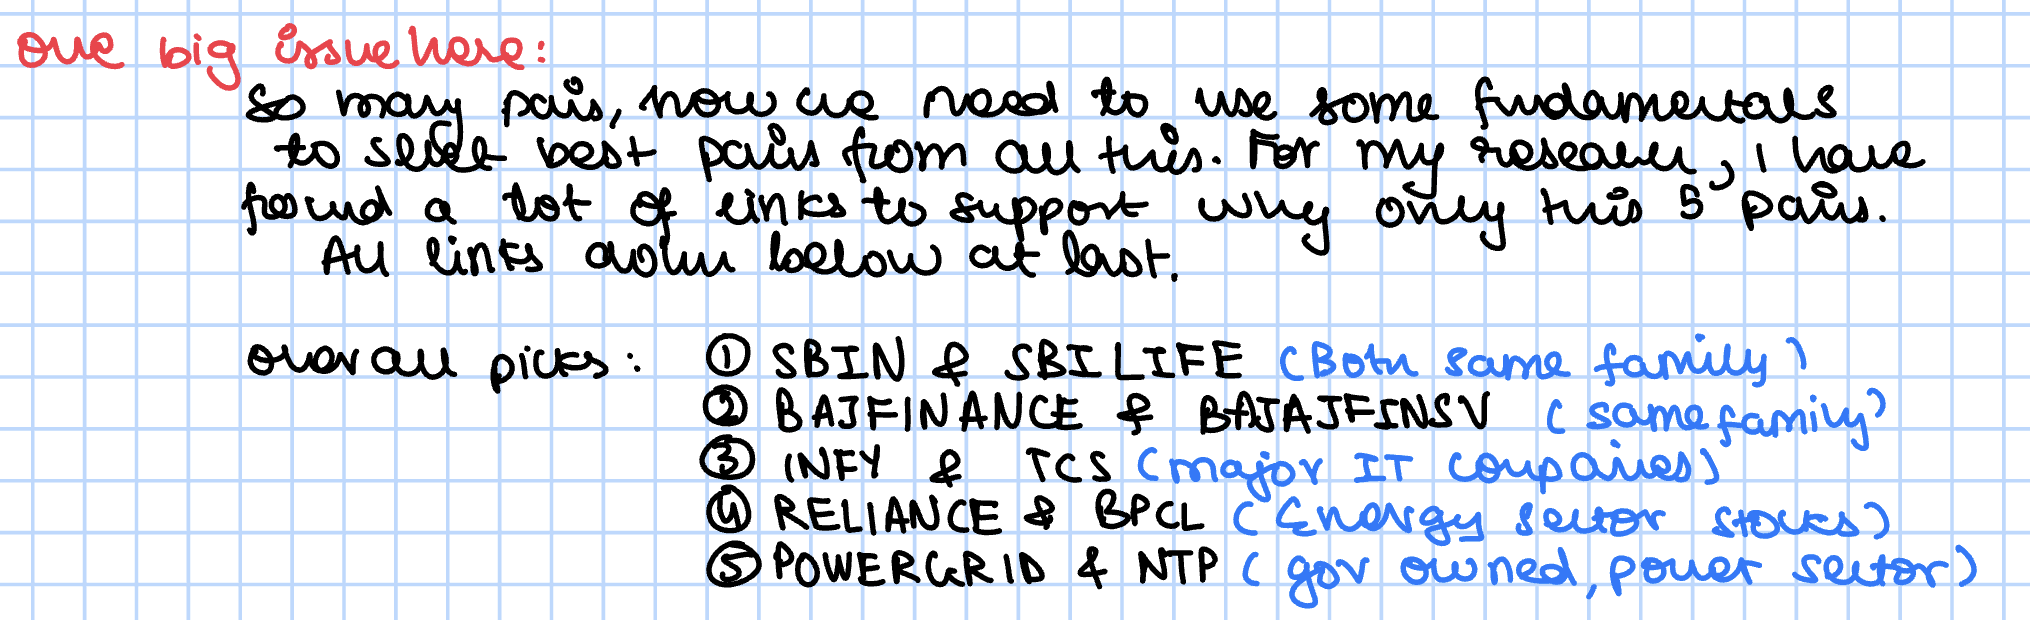

In [163]:
Image(filename='handwritten notes/intro8.png')

some functions I made

In [136]:
def get_headge_ratio(ticker1, ticker2, data):
    X = sm.add_constant(data[ticker1])
    y = data[ticker2]
    model = sm.OLS(y, X).fit()
    hedge_ratio = model.params[ticker1]

    return hedge_ratio #this is the aplha in our calculation


def spread(ticker1, ticker2, data, hedge_ratio):
    S2_bought = 100
    S1_bought = int(100*hedge_ratio)
    spread_v = 100*data[ticker2].iloc[-1] - int(100*hedge_ratio)*data[ticker1].iloc[-1]
    return spread_v, -1*S1_bought, S2_bought #this is the beta + epsilon per day

def plot_spread(ticker1, ticker2, data, hedge_ratio):
    t_values = range(0, len(data) - int(len(data)*0.7))
    spread_values_list = []
    dates = []

    for t in tqdm.tqdm(t_values):
        spread_values_list.append(spread(ticker1, ticker2, data[:int(len(data)*0.7) + t], hedge_ratio)[0])
        dates.append(data[:int(len(data)*0.7) + t].index[-1])
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, spread_values_list)
    plt.title(f'Spread between {ticker1} and {ticker2}')
    plt.xlabel('Date')
    plt.ylabel('Spread Value')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.xticks(dates[::len(dates)//50])
    plt.tight_layout()
    plt.show() #here we have made sure that we only plot the last 30% of the data for the spread


In [137]:
ticker1 = 'SBIN'
ticker2 = 'SBILIFE'

hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
_, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)

rev_hedge_ratio = get_headge_ratio(ticker2,ticker1, data[:int(len(data)*0.7)])
_, r_quantity_S1, _ = spread(ticker2, ticker1, data[:int(len(data)*0.7)], rev_hedge_ratio)

if r_quantity_S1 < quantity_S1:
    ticker1, ticker2 = ticker2, ticker1
    hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
    _, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)

plot_spread(ticker1, ticker2, data, hedge_ratio)


100%|██████████| 421/421 [00:00<00:00, 10829.09it/s]


<IPython.core.display.Javascript object>

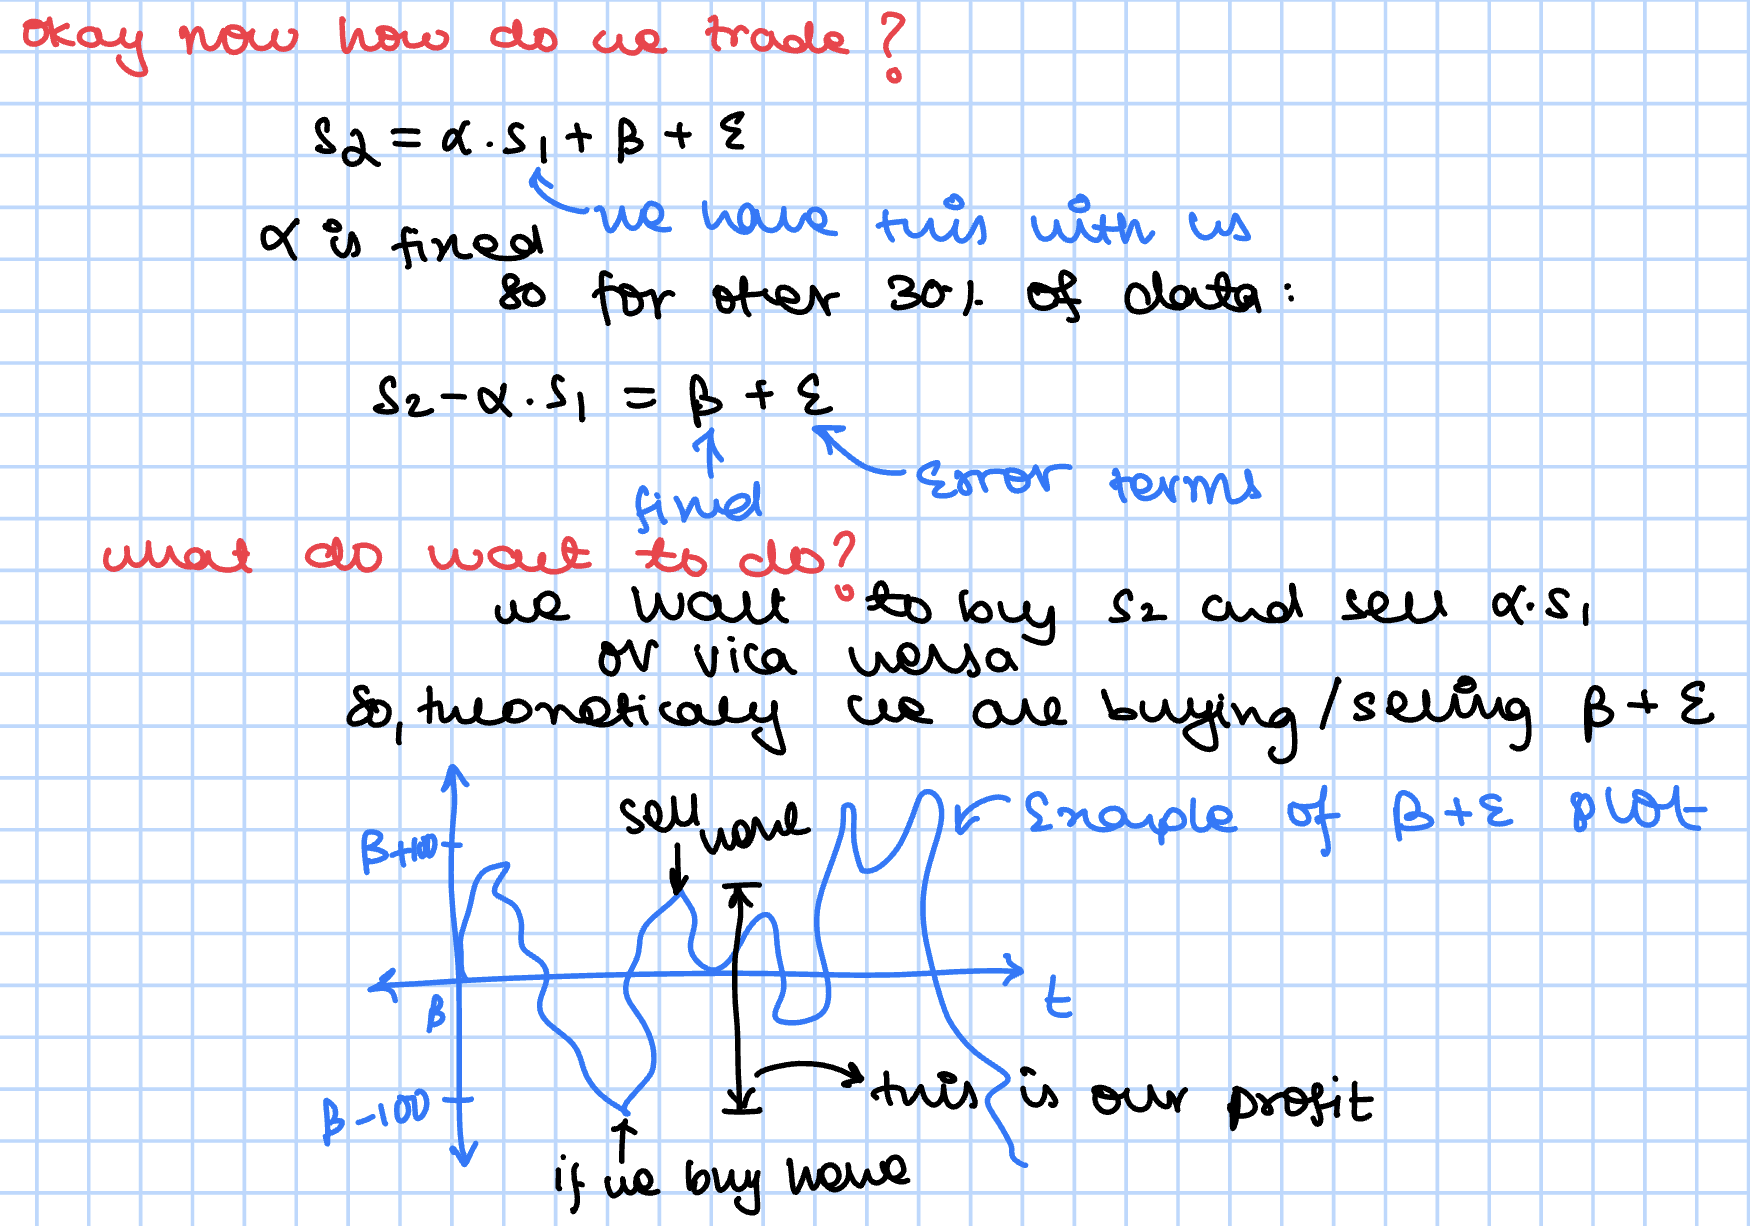

In [164]:
Image(filename='handwritten notes/intro9.png')

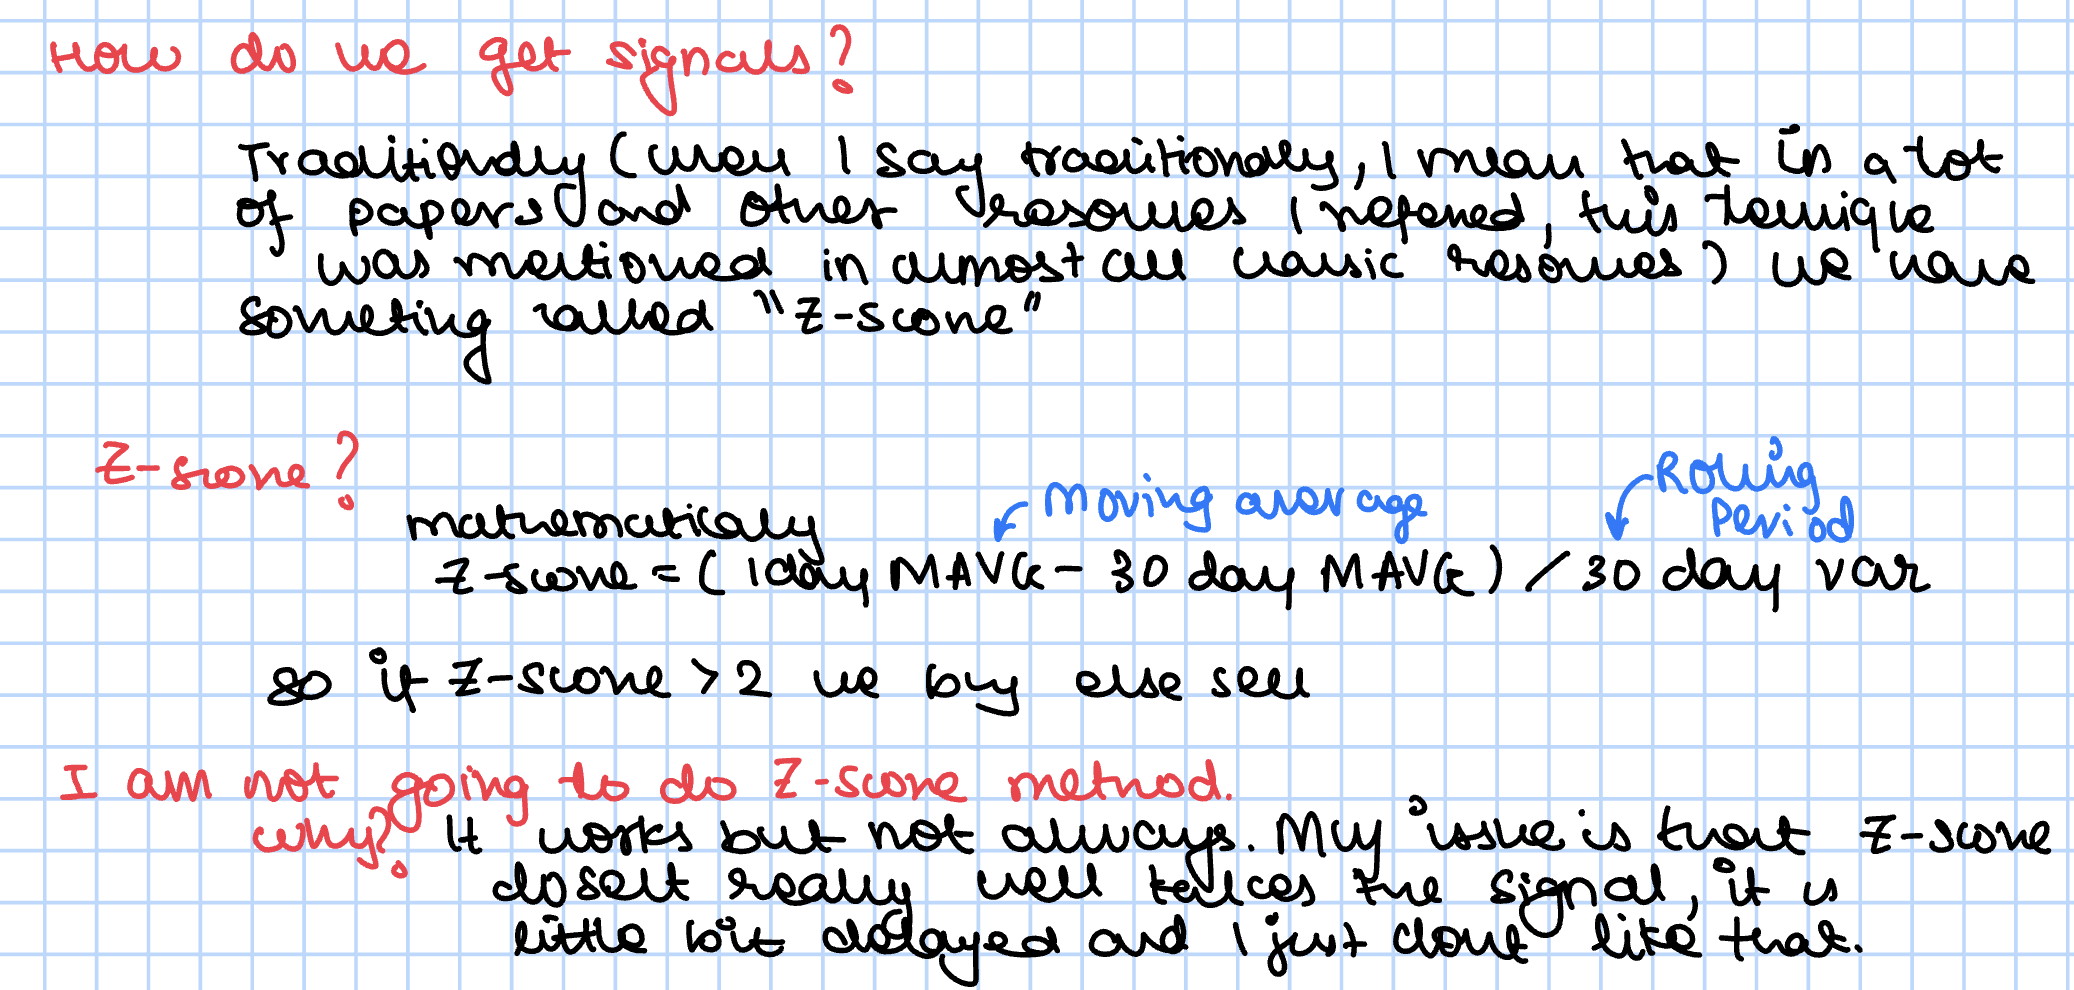

In [165]:
Image(filename='handwritten notes/intro10.png')

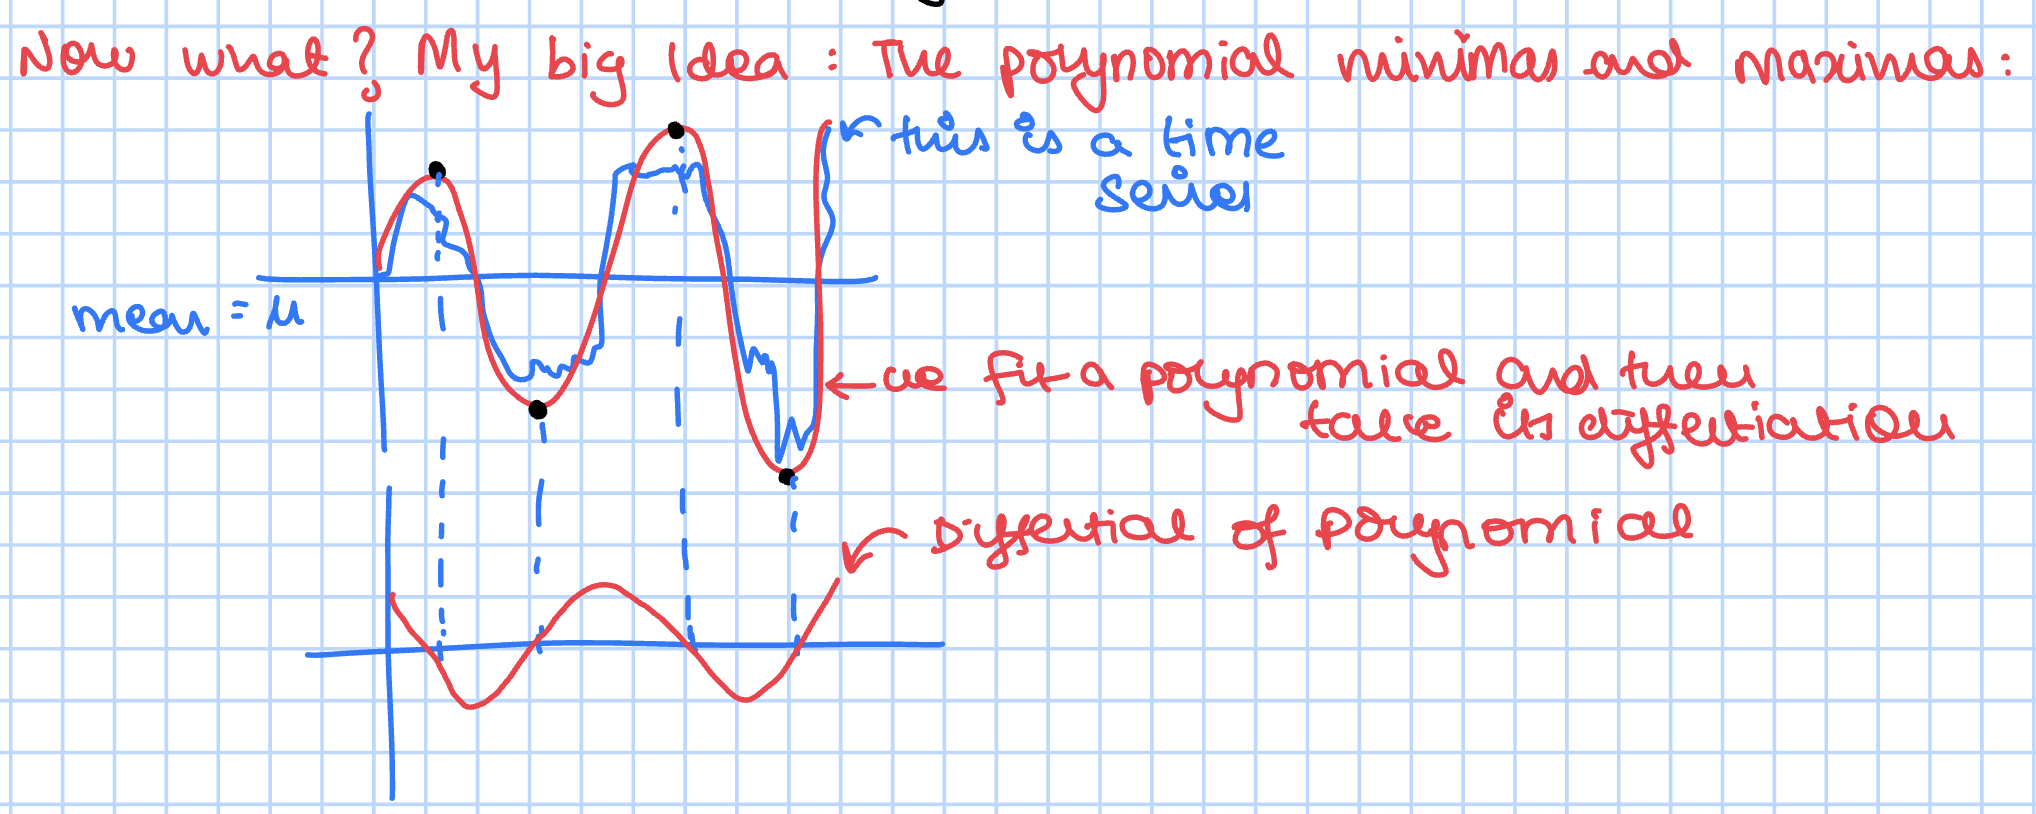

In [166]:
Image(filename='handwritten notes/intro11.png')

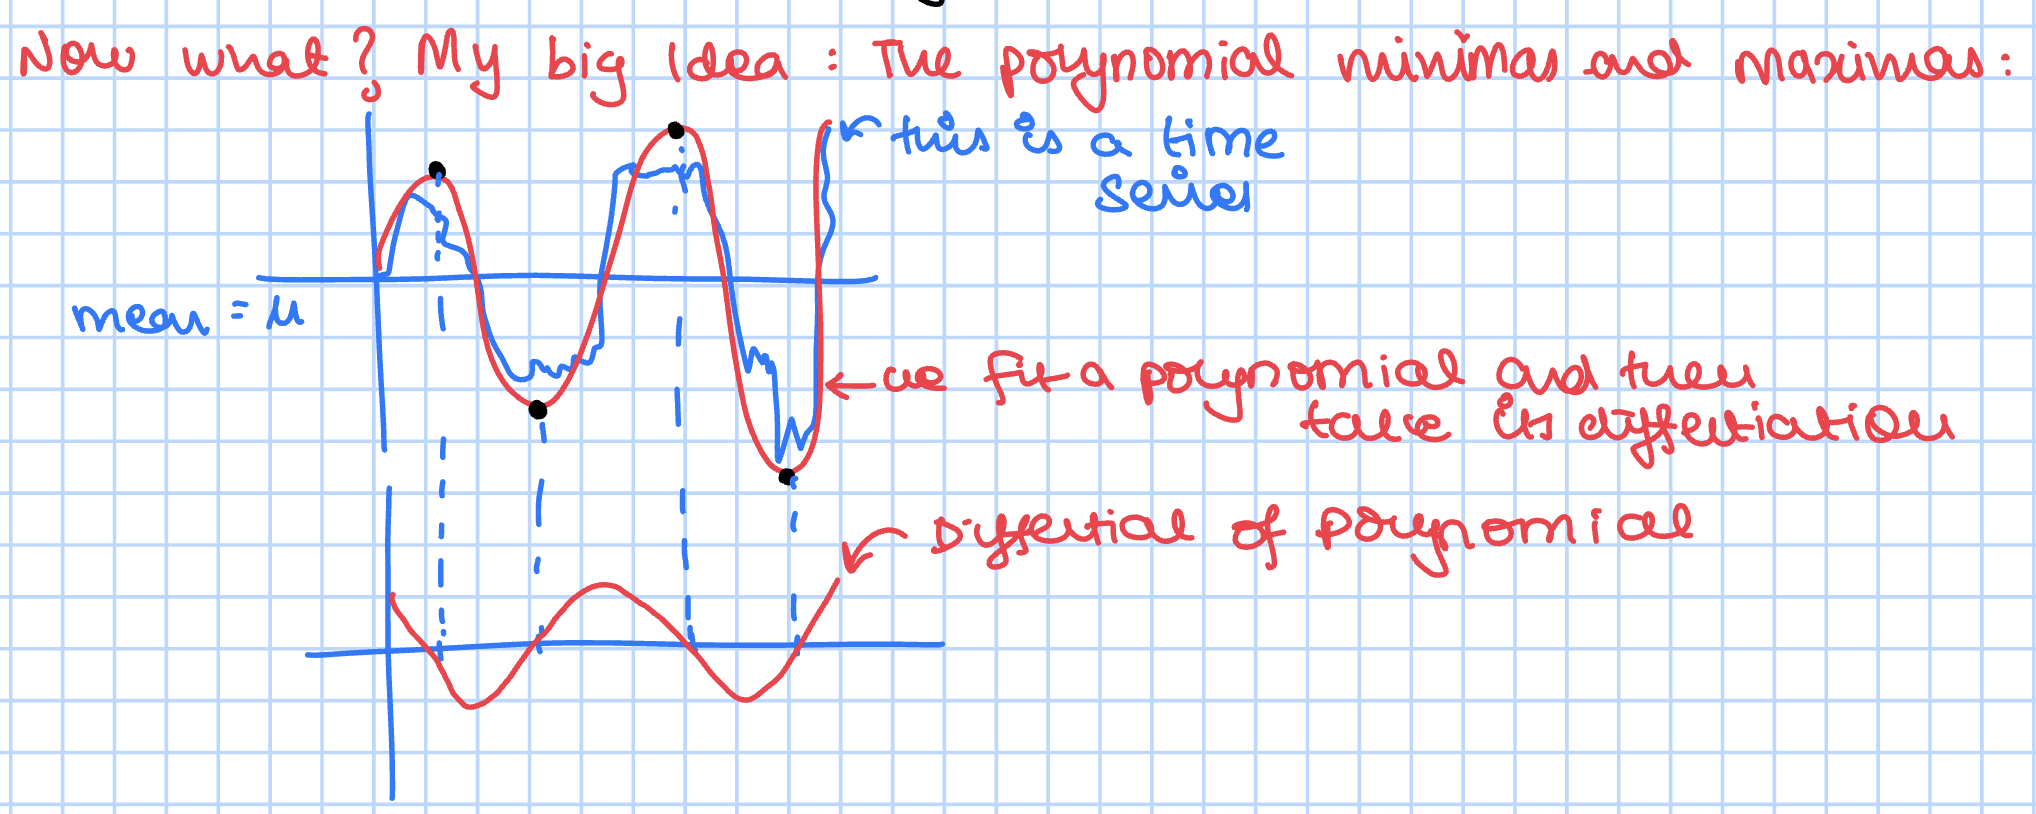

In [167]:
Image(filename='handwritten notes/intro11.png')

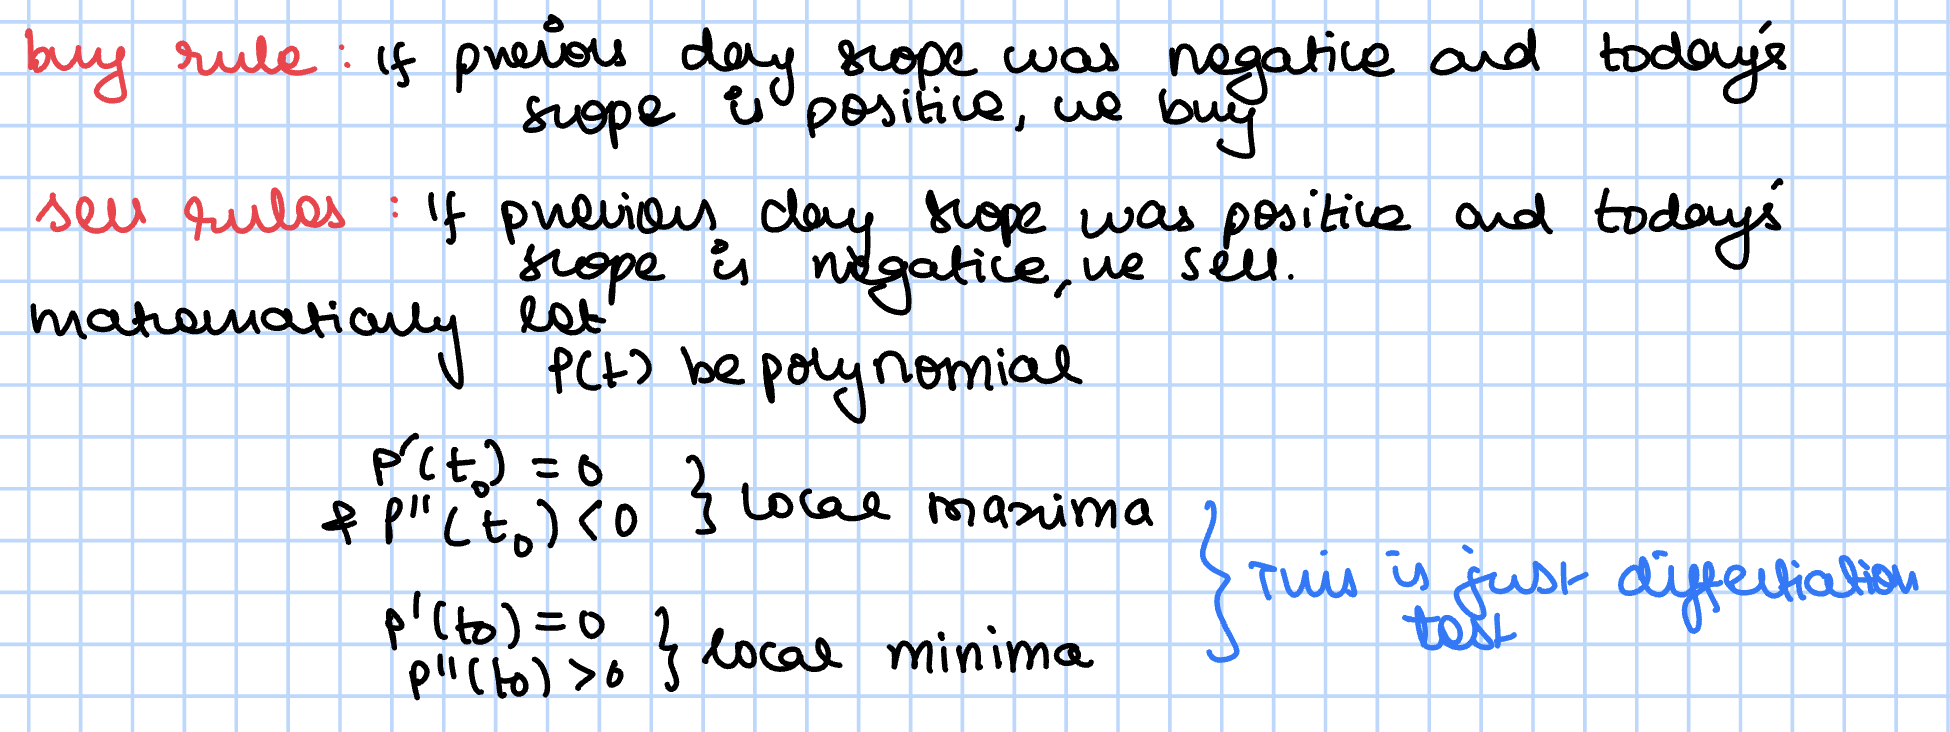

In [168]:
Image(filename='handwritten notes/intro12.png')

In [138]:
def get_polynomial_slope(spread_values_list, dates, closness):
    degree = min(int(len(dates) / closness) + 1, len(dates)-1)
    x = np.arange(len(dates))
    y = np.array(spread_values_list)
    
    coeffs = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coeffs)
    
    slope = polynomial.deriv()(x[-1])    
    return slope #we get the last day's slope

def make_slope_curve(spread_values_list, dates, closness):
    slopes = []
    for i in range(10, len(spread_values_list)):
        slope = get_polynomial_slope(spread_values_list[0:i], dates[0:i], closness)
        slopes.append(slope)
    plt.figure(figsize=(12, 8))
    plt.plot(dates[10:], slopes)
    plt.xlabel('time')
    plt.ylabel('Slope Value')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.xticks(dates[::len(dates)//50])
    plt.tight_layout()
    plt.show() #plotting the slope curv for my method

In [139]:
t_values = range(0, len(data) - int(len(data)*0.7))
spread_values_list = []
dates = []

for t in tqdm.tqdm(t_values):
    spread_values_list.append(spread(ticker1,ticker2, data[:int(len(data)*0.7) + t], hedge_ratio)[0])
    dates.append(data[:int(len(data)*0.7) + t].index[-1])

100%|██████████| 421/421 [00:00<00:00, 20305.91it/s]


In [140]:
make_slope_curve(spread_values_list, dates, 30) #closness of 30 means that after every 30 days, we change the degree of polynomial, we can see nice periodic value of slopes below

<IPython.core.display.Javascript object>

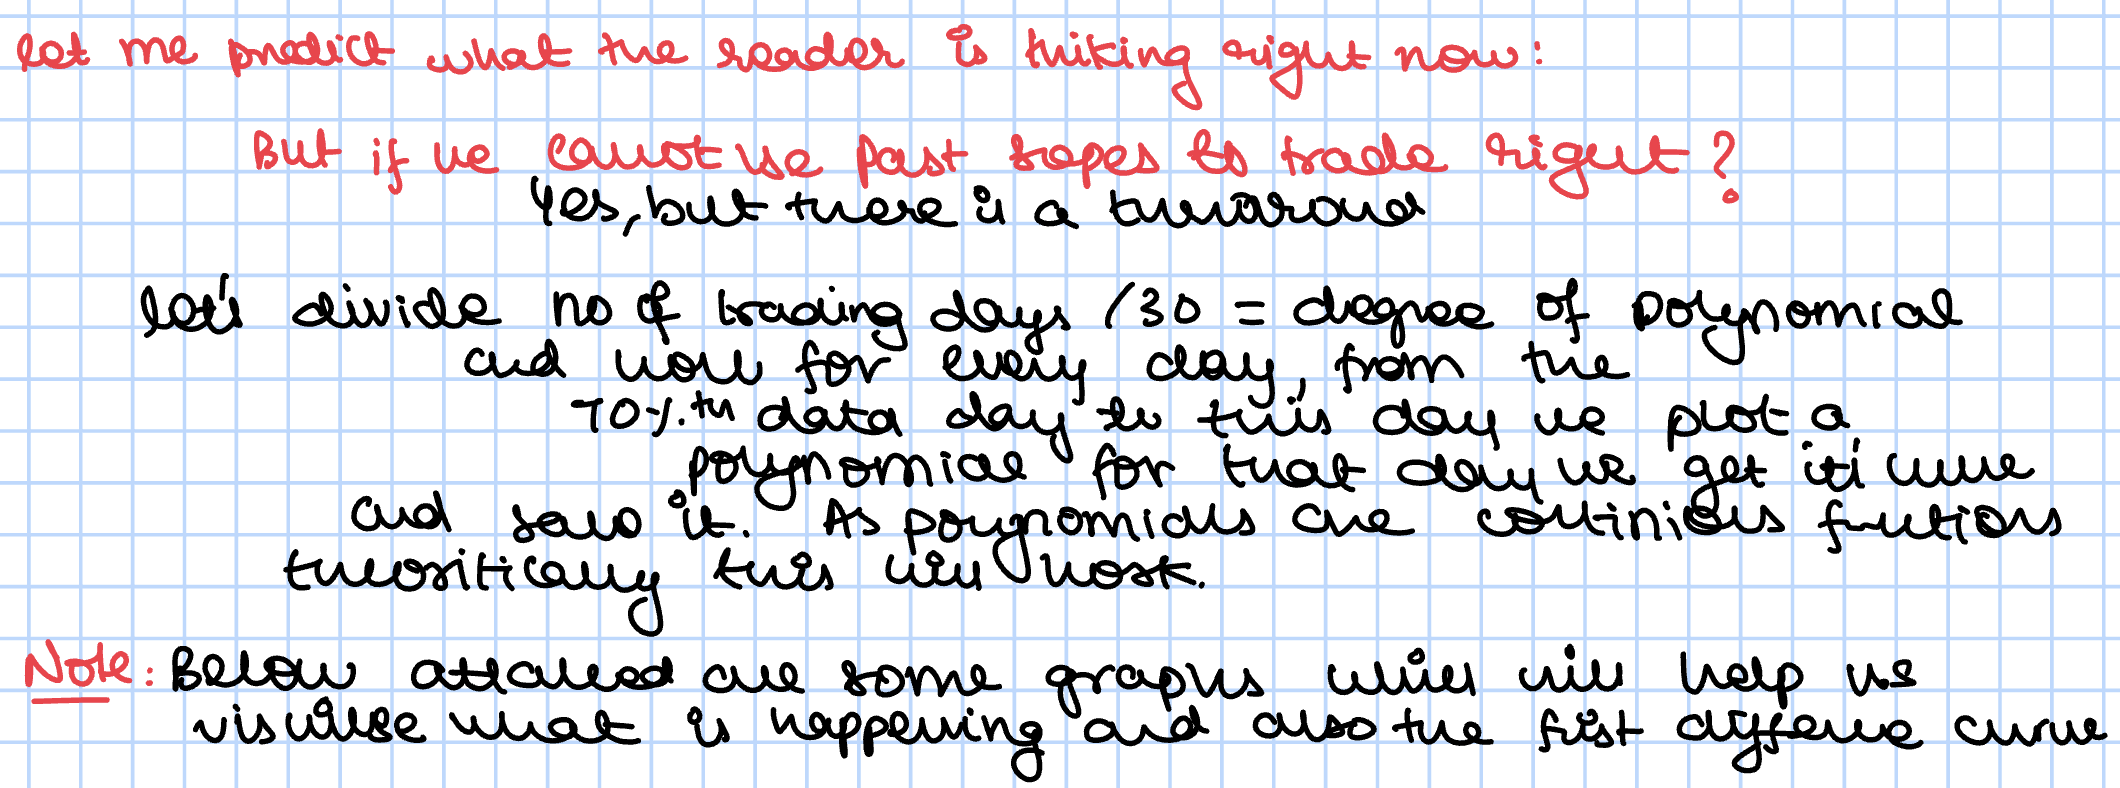

In [169]:
Image(filename='handwritten notes/intro13.png')

In [141]:
def get_signals(spread_values_list, dates, closness, quantity_S1, quantity_S2):
    slopes = []
    signals = []
    order_book = []
    for i in range(10, len(spread_values_list)):
        slope = get_polynomial_slope(spread_values_list[0:i], dates[0:i], closness)
        if len(slopes) > 0:
            if slopes[-1] > 0 and slope < 0:
                signals.append((dates[i], "buy", spread_values_list[i]))
                order_book.append((dates[i], quantity_S1, quantity_S2))
            if slopes[-1] < 0 and slope > 0:
                signals.append((dates[i], "sell", spread_values_list[i]))
                order_book.append((dates[i], -1*quantity_S1, -1*quantity_S2))
        slopes.append(slope)
    return signals, order_book #getting signals, again I have not used future data in anyway

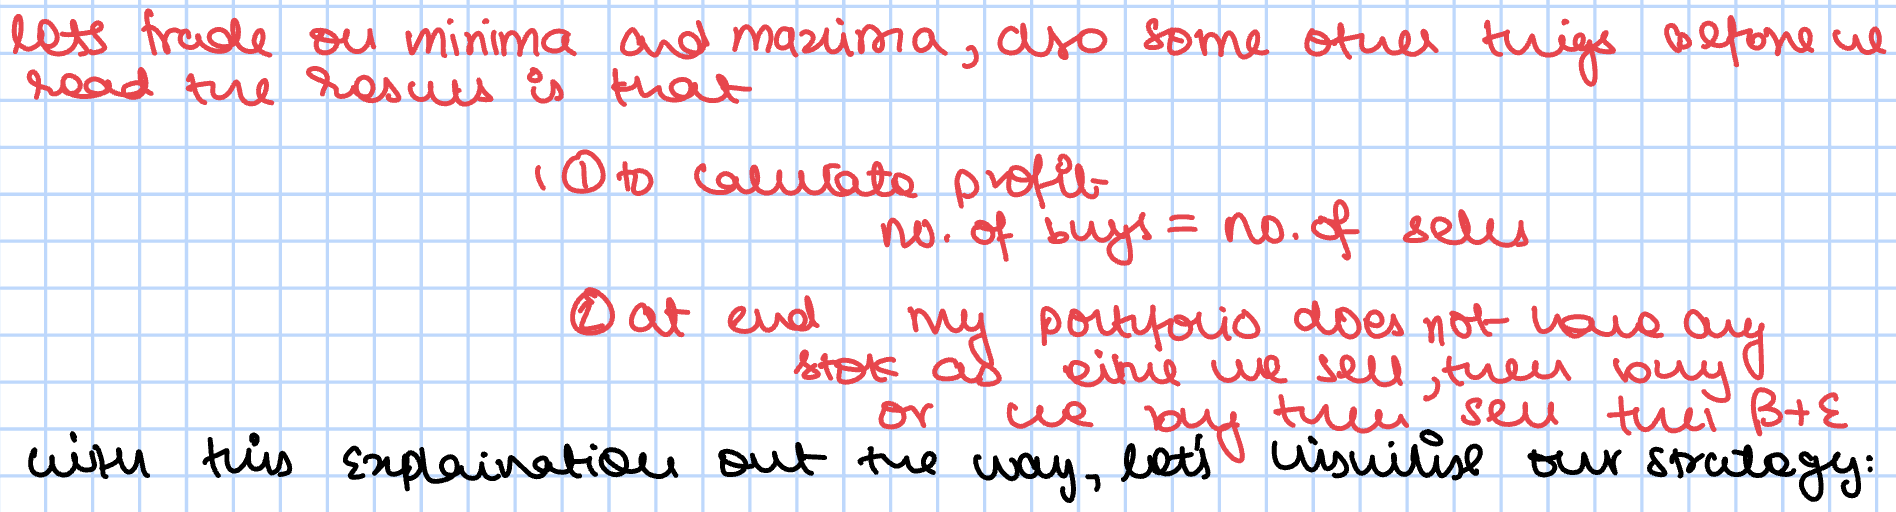

In [170]:
Image(filename='handwritten notes/intro14.png')

In [142]:
def final_metrics(ticker1, ticker2, data, closness, verbos = True):
    hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
    _, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)

    rev_hedge_ratio = get_headge_ratio(ticker2,ticker1, data[:int(len(data)*0.7)])
    _, r_quantity_S1, _ = spread(ticker2, ticker1, data[:int(len(data)*0.7)], rev_hedge_ratio)

    if r_quantity_S1 < quantity_S1:
        ticker1, ticker2 = ticker2, ticker1
        hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
        _, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)


    t_values = range(0, len(data) - int(len(data)*0.7))
    spread_values_list = []
    dates = []

    for t in tqdm.tqdm(t_values):
        spread_values_list.append(spread(ticker1,ticker2, data[:int(len(data)*0.7) + t], hedge_ratio)[0])
        dates.append(data[:int(len(data)*0.7) + t].index[-1])
    
    if verbos:
        print(f"spread is made up of {quantity_S1}*{ticker1} + {quantity_S2}*{ticker2}")    
    signals, _ = get_signals(spread_values_list, dates, closness, quantity_S1, quantity_S2)

    if verbos:
        plt.figure(figsize=(12, 6))
        plt.plot(dates, spread_values_list)
        
        for date, signal, price in signals:
            if signal == 'buy':
                plt.scatter(date, price, color='green', marker='^', s=100)
            elif signal == 'sell':
                plt.scatter(date, price, color='red', marker='v', s=100)
        
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.xticks(dates[::len(dates)//50])
        plt.tight_layout()
        plt.show()

    total_profit = 0
    for date, signal, price in signals:
        if signal == "sell":
            total_profit += price
        if signal == "buy":
            total_profit -= price
    
    if signals[0][1] == "buy" and signals[-1][1] == "buy":
        total_profit += signals[-1][2]
        if verbos:
            print("haven't counted the last buy trade in final profit calculation to equate number of buys = number of sells")

    if signals[0][1] == "sell" and signals[-1][1] == "sell":
        total_profit -= signals[-1][2]
        if verbos:
            print("haven't counted the last sell trade in final profit calculation to equate number of buys = number of sells")

    if verbos:
        print(f"total profit: {total_profit}")
        for date, signal, price in signals:
            print(f"on {date}, {signal} at {price}")
    
    return total_profit

In [143]:
print(final_metrics('SBILIFE', 'SBIN', data, 30, verbos=True))

100%|██████████| 421/421 [00:00<00:00, 21498.25it/s]

spread is made up of -119*SBIN + 100*SBILIFE


<IPython.core.display.Javascript object>

total profit: 26498.79880999998
on 2023-09-26 09:15:00, buy at 58236.39761999999
on 2023-10-18 09:15:00, sell at 67489.64761999999
on 2023-12-18 09:15:00, buy at 67523.5
on 2024-01-23 09:15:00, sell at 65543.10238000001
on 2024-02-15 09:15:00, buy at 54692.69881
on 2024-02-28 09:15:00, sell at 65662.5
on 2024-04-03 09:15:00, buy at 54325.05119
on 2024-05-22 09:15:00, sell at 45308.75
on 2024-07-04 09:15:00, buy at 50898.30119
on 2024-07-26 09:15:00, sell at 72463.44881
on 2024-08-12 09:15:00, buy at 73800.60238000001
on 2024-08-22 09:15:00, sell at 81909.30119
on 2024-09-30 09:15:00, buy at 90639.90000000001
on 2024-11-14 09:15:00, sell at 60524.25
on 2024-11-26 09:15:00, buy at 50786.40000000001
on 2024-12-27 09:15:00, sell at 45371.65000000001
on 2025-01-24 09:15:00, buy at 55486.15000000001
on 2025-02-11 09:15:00, sell at 54899.09999999999
on 2025-03-07 09:15:00, buy at 53962.75
on 2025-03-21 09:15:00, sell at 65009.2
on 2025-04-02 09:15:00, buy at 63646.95
on 2025-04-29 09:15:00, s

In [144]:
print(final_metrics('BAJFINANCE', 'BAJAJFINSV', data, 30, verbos=True))

100%|██████████| 421/421 [00:00<00:00, 21759.46it/s]

spread is made up of -379*BAJAJFINSV + 100*BAJFINANCE


<IPython.core.display.Javascript object>

total profit: 112334.66999999969
on 2023-09-14 09:15:00, sell at 161638.88
on 2023-10-19 09:15:00, buy at 164584.72999999998
on 2023-12-20 09:15:00, sell at 112333.92000000004
on 2024-01-31 09:15:00, buy at 69543.29000000004
on 2024-03-18 09:15:00, sell at 52763.04000000004
on 2024-05-03 09:15:00, buy at 76403.30000000005
on 2024-06-07 09:15:00, sell at 124981.68999999994
on 2024-07-16 09:15:00, buy at 94980.55000000005
on 2024-08-09 09:15:00, sell at 70504.21999999997
on 2024-08-19 09:15:00, buy at 73768.10999999999
on 2024-09-30 09:15:00, sell at 22381.400000000023
on 2024-10-17 09:15:00, buy at 1761.8000000000466
on 2024-10-22 09:15:00, sell at 14924.599999999977
on 2024-11-12 09:15:00, buy at 22646.75
on 2024-12-27 09:15:00, sell at 92220.30000000005
on 2025-01-14 09:15:00, buy at 84083.5
on 2025-01-17 09:15:00, sell at 81243.65000000002
on 2025-02-17 09:15:00, buy at 124511.84999999998
on 2025-03-24 09:15:00, sell at 191122.1499999999
on 2025-04-01 09:15:00, buy at 135659.10000000

In [145]:
print(final_metrics('INFY', 'TCS', data, 30, verbos=True))

100%|██████████| 421/421 [00:00<00:00, 20251.18it/s]

spread is made up of -156*INFY + 100*TCS


<IPython.core.display.Javascript object>

total profit: 14052.830000000133
on 2023-10-13 09:15:00, buy at 133825.61
on 2023-10-16 09:15:00, sell at 128677.59999999998
on 2023-10-17 09:15:00, buy at 125682.79999999999
on 2023-11-24 09:15:00, sell at 121475.60999999999
on 2024-01-09 09:15:00, buy at 130419.19
on 2024-02-15 09:15:00, sell at 148809.42000000004
on 2024-04-05 09:15:00, buy at 167185.40000000002
on 2024-05-22 09:15:00, sell at 156251.2
on 2024-05-23 09:15:00, buy at 159650.59999999998
on 2024-06-13 09:15:00, sell at 154758.78999999998
on 2024-07-11 09:15:00, buy at 134548.8
on 2024-07-16 09:15:00, sell at 148511.02000000002
on 2024-07-31 09:15:00, buy at 147088.00999999995
on 2024-08-21 09:15:00, sell at 163008.8
on 2024-08-30 09:15:00, buy at 152157.8
on 2024-10-03 09:15:00, sell at 127904.59999999998
on 2024-10-15 09:15:00, buy at 106029.20000000001
on 2024-10-21 09:15:00, sell at 118956.0
on 2024-11-14 09:15:00, buy at 123720.19999999995
on 2025-01-01 09:15:00, sell at 117575.0
on 2025-02-06 09:15:00, buy at 1094

In [146]:
print(final_metrics('RELIANCE', 'BPCL', data, 30, verbos=True))

100%|██████████| 421/421 [00:00<00:00, 19801.54it/s]

spread is made up of 6*RELIANCE + 100*BPCL


<IPython.core.display.Javascript object>

total profit: 8892.544599999972
on 2023-09-28 09:15:00, buy at 24199.800800000005
on 2023-11-06 09:15:00, sell at 25329.5
on 2024-01-09 09:15:00, buy at 30739.000500000002
on 2024-02-02 09:15:00, sell at 36663.69869999999
on 2024-03-12 09:15:00, buy at 40125.050800000005
on 2024-04-25 09:15:00, sell at 38929.851
on 2024-06-06 09:15:00, buy at 37797.101
on 2024-07-19 09:15:00, sell at 39710.899
on 2024-07-23 09:15:00, buy at 39527.4
on 2024-07-26 09:15:00, sell at 41934.149
on 2024-09-12 09:15:00, buy at 43308.8
on 2024-10-03 09:15:00, sell at 43326.85
on 2024-10-07 09:15:00, buy at 41724.35
on 2024-11-12 09:15:00, sell at 38625.5
on 2024-12-24 09:15:00, buy at 36536.5
on 2025-02-06 09:15:00, sell at 33944.3
on 2025-03-04 09:15:00, buy at 31963.4
on 2025-03-05 09:15:00, sell at 32637.6
on 2025-03-24 09:15:00, buy at 35856.6
on 2025-04-29 09:15:00, sell at 39568.2
8892.544599999972


In [147]:
print(final_metrics('POWERGRID', 'NTPC', data, 30, verbos=True))

100%|██████████| 421/421 [00:00<00:00, 18965.71it/s]

spread is made up of -100*POWERGRID + 100*NTPC


<IPython.core.display.Javascript object>

haven't counted the last buy trade in final profit calculation to equate number of buys = number of sells
total profit: 479.99999999999636
on 2023-10-06 09:15:00, buy at 3850.0
on 2023-11-24 09:15:00, sell at 4344.999
on 2024-01-09 09:15:00, buy at 7745.0
on 2024-02-21 09:15:00, sell at 5599.999999999996
on 2024-04-23 09:15:00, buy at 6179.998000000003
on 2024-05-29 09:15:00, sell at 4689.999999999993
on 2024-07-15 09:15:00, buy at 4175.0
on 2024-07-16 09:15:00, sell at 3800.0
on 2024-07-19 09:15:00, buy at 3244.9979999999996
on 2024-07-25 09:15:00, sell at 5269.998
on 2024-08-14 09:15:00, buy at 6285.000999999997
on 2024-09-20 09:15:00, sell at 8310.0
on 2024-11-04 09:15:00, buy at 8550.0
on 2024-12-10 09:15:00, sell at 4125.0
on 2025-01-14 09:15:00, buy at 2014.9999999999964
on 2025-01-15 09:15:00, sell at 2270.0000000000073
on 2025-02-06 09:15:00, buy at 3165.0000000000036
on 2025-02-14 09:15:00, sell at 4300.0
on 2025-02-17 09:15:00, buy at 3915.0000000000036
on 2025-02-21 09:15:00

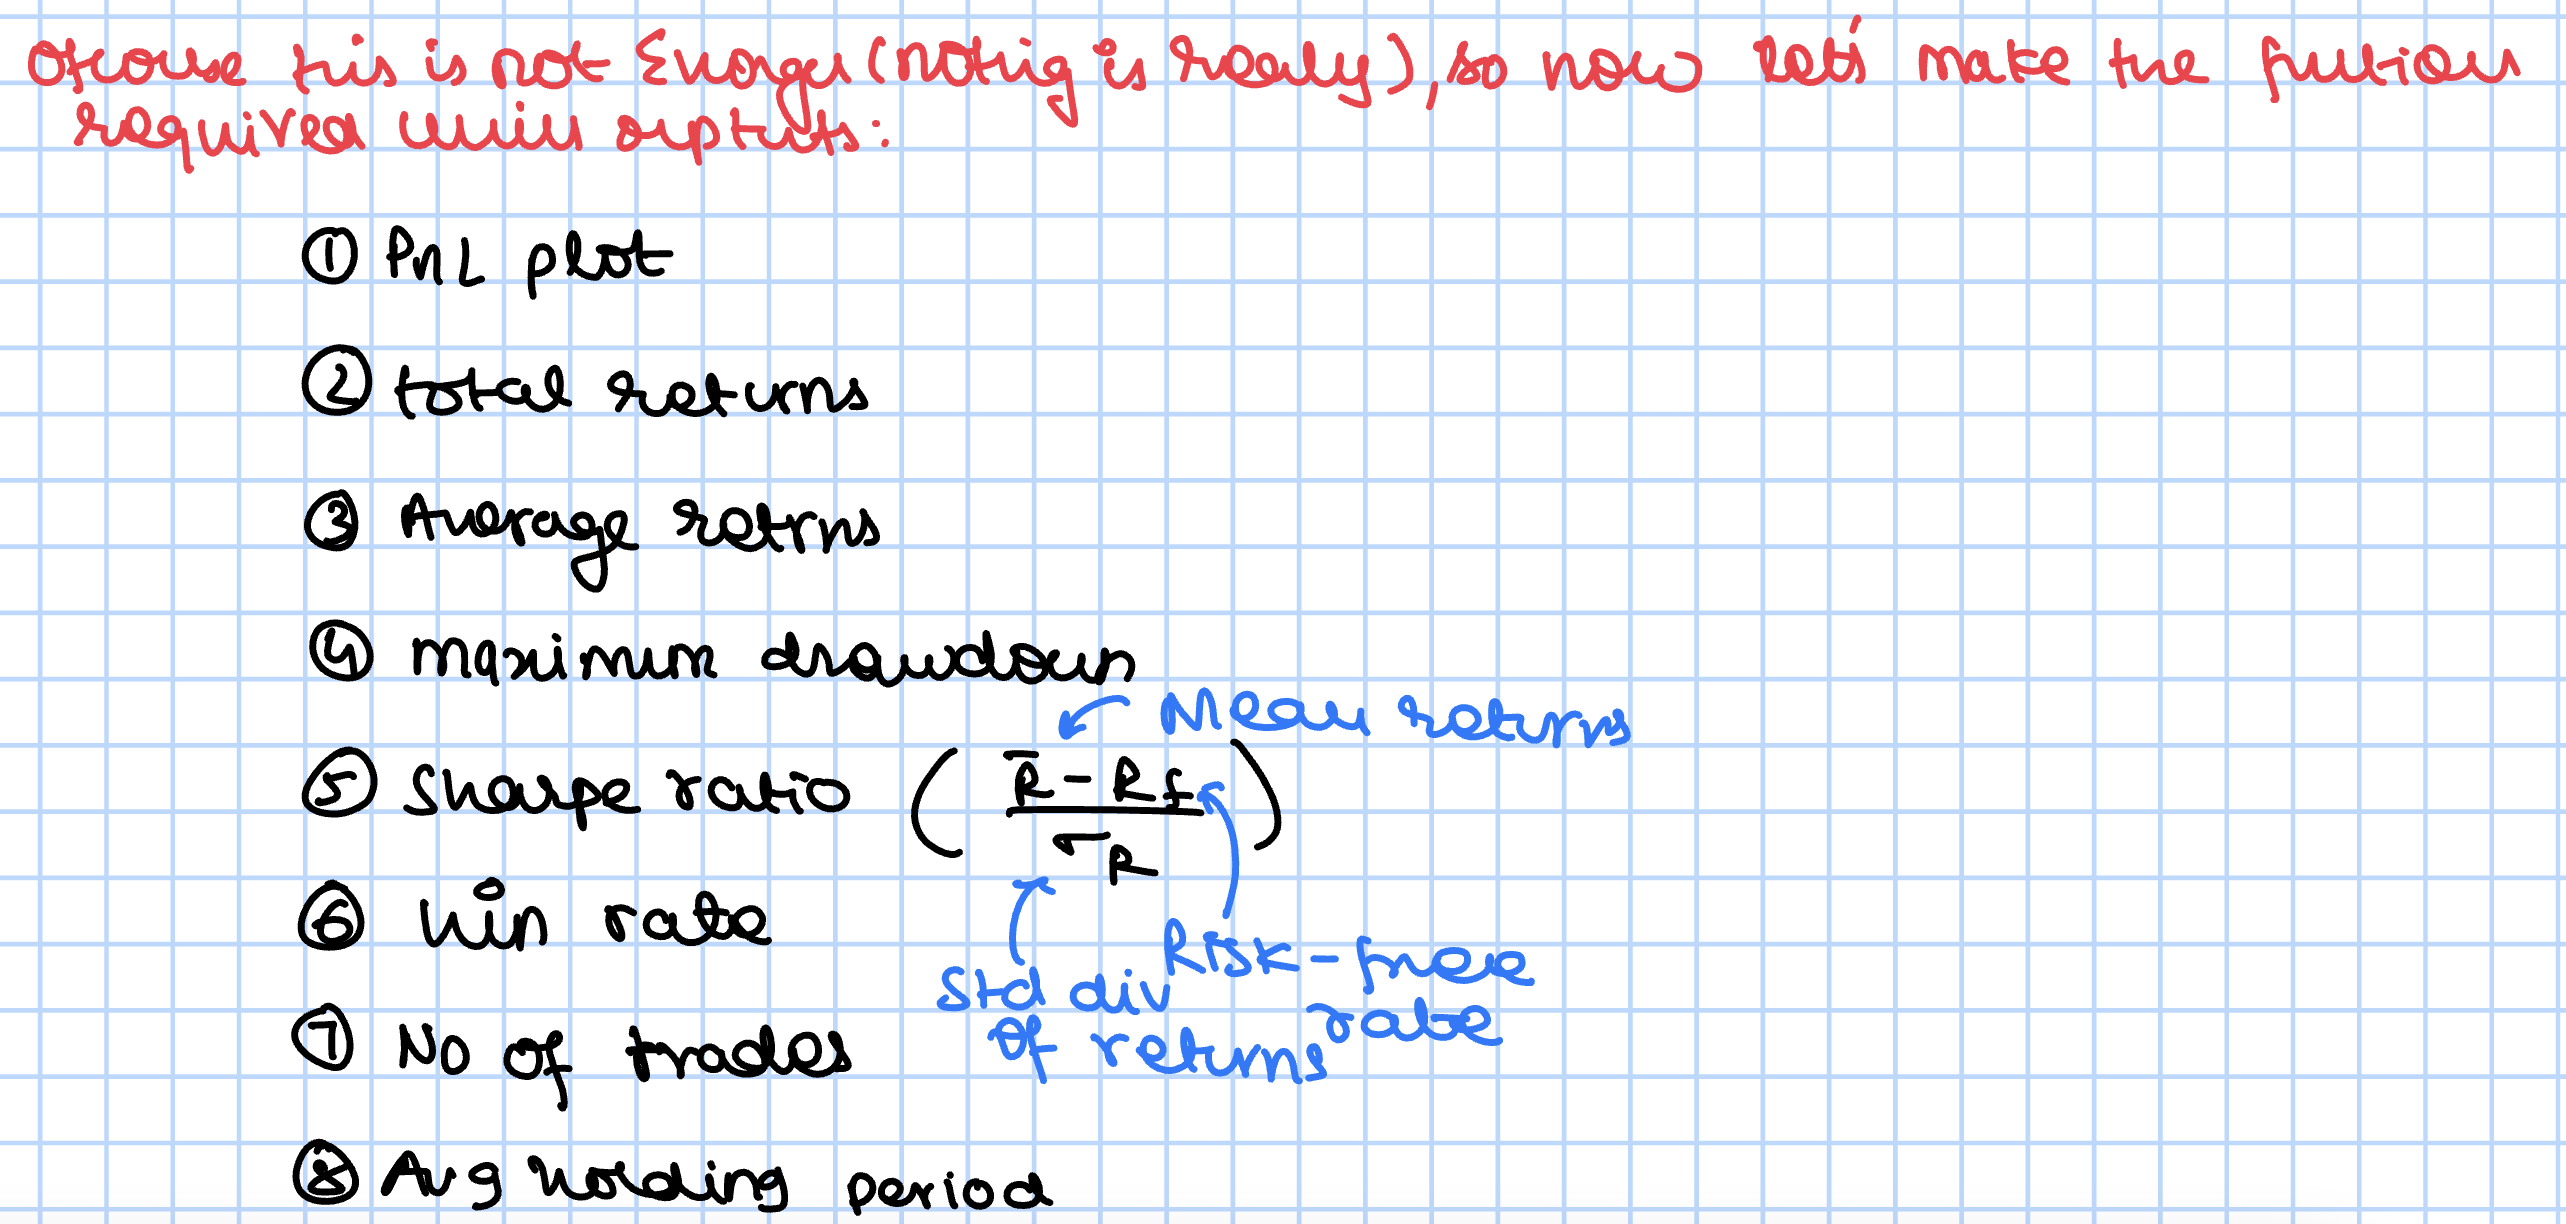

In [171]:
Image(filename='handwritten notes/intro15.png')

In [185]:
def general_function(ticker1, ticker2, data, com=0.0005, slipage=0.0001, risk_free_rate = 0.05): #0.05% and 0.01%
    hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
    _, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)

    rev_hedge_ratio = get_headge_ratio(ticker2,ticker1, data[:int(len(data)*0.7)])
    _, r_quantity_S1, _ = spread(ticker2, ticker1, data[:int(len(data)*0.7)], rev_hedge_ratio)

    if r_quantity_S1 < quantity_S1:
        ticker1, ticker2 = ticker2, ticker1
        hedge_ratio = get_headge_ratio(ticker1,ticker2, data[:int(len(data)*0.7)])
        _, quantity_S1, quantity_S2 = spread(ticker1,ticker2, data[:int(len(data)*0.7)], hedge_ratio)
    #this is like our nomenclature, I just use (s1, s2) or (s2, s1) depending on headge ratio
    #I did this to ensure that (s1, s2) or (s2, s1) will get same answer

    t_values = range(0, len(data) - int(len(data)*0.7))
    spread_values_list = []
    dates = []



    for t in tqdm.tqdm(t_values):
        spread_values_list.append(spread(ticker1,ticker2, data[:int(len(data)*0.7) + t], hedge_ratio)[0])
        dates.append(data[:int(len(data)*0.7) + t].index[-1])
    
    signals, _ = get_signals(spread_values_list, dates, 30, quantity_S1, quantity_S2)

    signals = signals
    prices = spread_values_list
    dates = dates

    first_buy_date = signals[0][0]
    second_buy_date = signals[1][0]

    initial_portfolio = abs(quantity_S1 * data.loc[first_buy_date, ticker1]) + abs(quantity_S2 * data.loc[first_buy_date, ticker2])
    #this is just |total buy| + |total sell| on the first day

    if initial_portfolio < max(spread_values_list):
        initial_portfolio = max(spread_values_list) + 1000


    df = pd.DataFrame({
        "datetime": pd.to_datetime(dates),
        "open": prices,
        "high": prices,
        "low": prices,
        "close": prices,
        "volume": [1000] * len(prices) #not going to use anyway, just to satisfy bt
    })

    df.set_index("datetime", inplace=True)
    df["signal"] = 0
    signal_map = {
        "buy": 1,
        "sell": -1
    }

    for date, signal, _ in signals:
        dt = pd.to_datetime(date)
        if dt in df.index:
            df.at[dt, "signal"] = signal_map[signal]

    class SignalStrategy(bt.SignalStrategy):
        def __init__(self):
            self.signal_add(bt.SIGNAL_LONG, self.data.signal)

    class PandasSignalData(bt.feeds.PandasData):
        lines = ('signal',)
        params = (('signal', -1),)

    data = PandasSignalData(dataname=df)


    cerebro = bt.Cerebro()
    cerebro.addstrategy(SignalStrategy)
    cerebro.adddata(data)
    cerebro.broker.set_cash(initial_portfolio)

    cerebro.broker.setcommission(commission=com) 
    cerebro.broker.set_slippage_perc(slipage)


    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='ta')
    cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')

    results = cerebro.run()
    strat = results[0]

    dd = strat.analyzers.drawdown.get_analysis()
    ta = strat.analyzers.ta.get_analysis()
    returns = strat.analyzers.timereturn.get_analysis()

    initial_cash = initial_portfolio
    final_value = cerebro.broker.getvalue()
    total_return = (final_value - initial_cash) / initial_cash #percentage returns

    daily_returns = pd.Series(returns)
    average_return = daily_returns.mean() #this is also percentage returns

    excess_daily_returns = daily_returns - (risk_free_rate / 252)

    mean_excess_return = excess_daily_returns.mean()
    std_excess_return = excess_daily_returns.std(ddof=1)

    sharpe_ratio = (mean_excess_return / std_excess_return) * np.sqrt(252) if std_excess_return != 0 else 0

    total_trades = ta.total.closed if 'total' in ta and 'closed' in ta.total else 0
    win_trades = ta.won.total if 'won' in ta else 0
    win_rate = win_trades / total_trades if total_trades > 0 else 0

    avg_holding = ta.len.average if 'len' in ta and 'average' in ta.len else 0

    performance_metrics = {
        "Total Return": f"{total_return * 100:.2f}%",
        "Average Daily Return": f"{average_return * 100:.4f}%",
        "Sharpe Ratio": f"{sharpe_ratio:.2f}",
        "Max Drawdown": f"{(dd.max.drawdown):.2f}%",
        "Total Trades": str(total_trades),
        "Win Rate": f"{win_rate * 100:.2f}%",
        "Avg Holding Period": f"{avg_holding:.2f} days"
    }

    cumulative_returns = (1 + daily_returns).cumprod()
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns.index, cumulative_returns.values, linewidth=2, color='#2E86C1')
    plt.title("Cumulative PnL", fontsize=14, pad=15)
    plt.xlabel("Date", fontsize=12, labelpad=10)
    plt.ylabel("Cumulative Returns", fontsize=12, labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig('cumulative_returns.png', dpi=300, bbox_inches='tight')
    plt.close()

    plt.figure(figsize=(12, 8))
    cerebro.plot(style='line', barup='green', bardown='red', volume=False)
    plt.xlabel('Date', fontsize=8, labelpad=5)
    plt.ylabel('Portfolio Value', fontsize=8, labelpad=5)
    plt.tight_layout()
    plt.savefig('cerebro.png', dpi=300, bbox_inches='tight')
    plt.close()

    from IPython.display import Image, display

    display(Image('cumulative_returns.png'))
    display(Image('cerebro.png'))

    return performance_metrics

100%|██████████| 421/421 [00:00<00:00, 14045.51it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

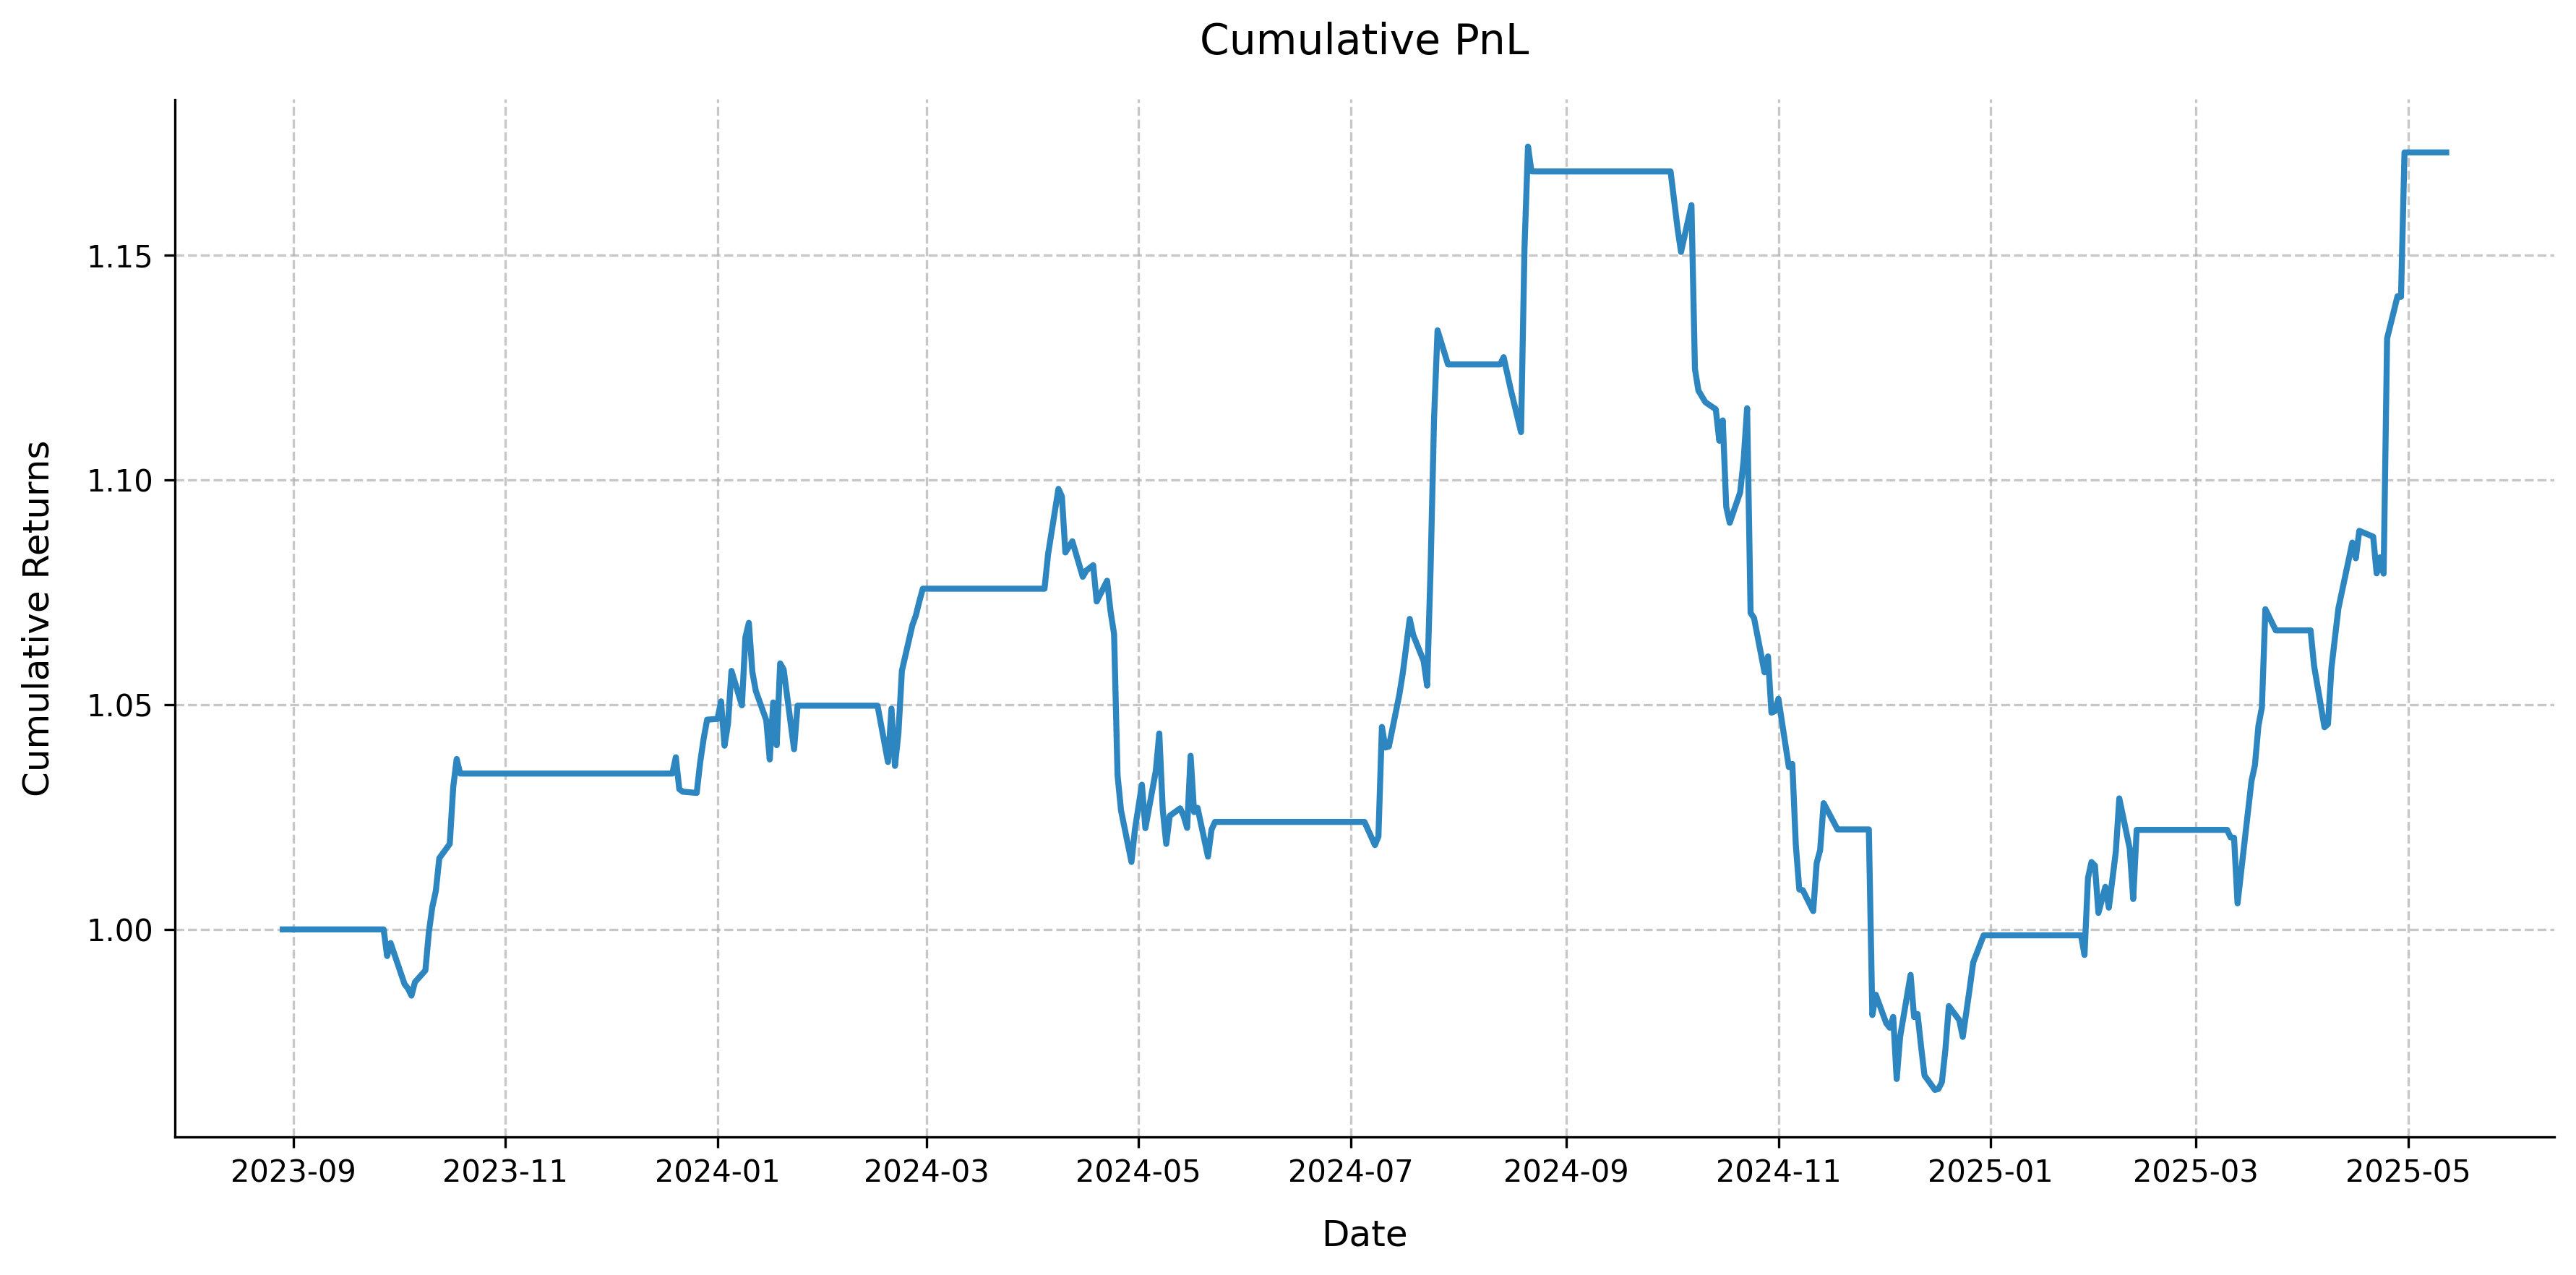

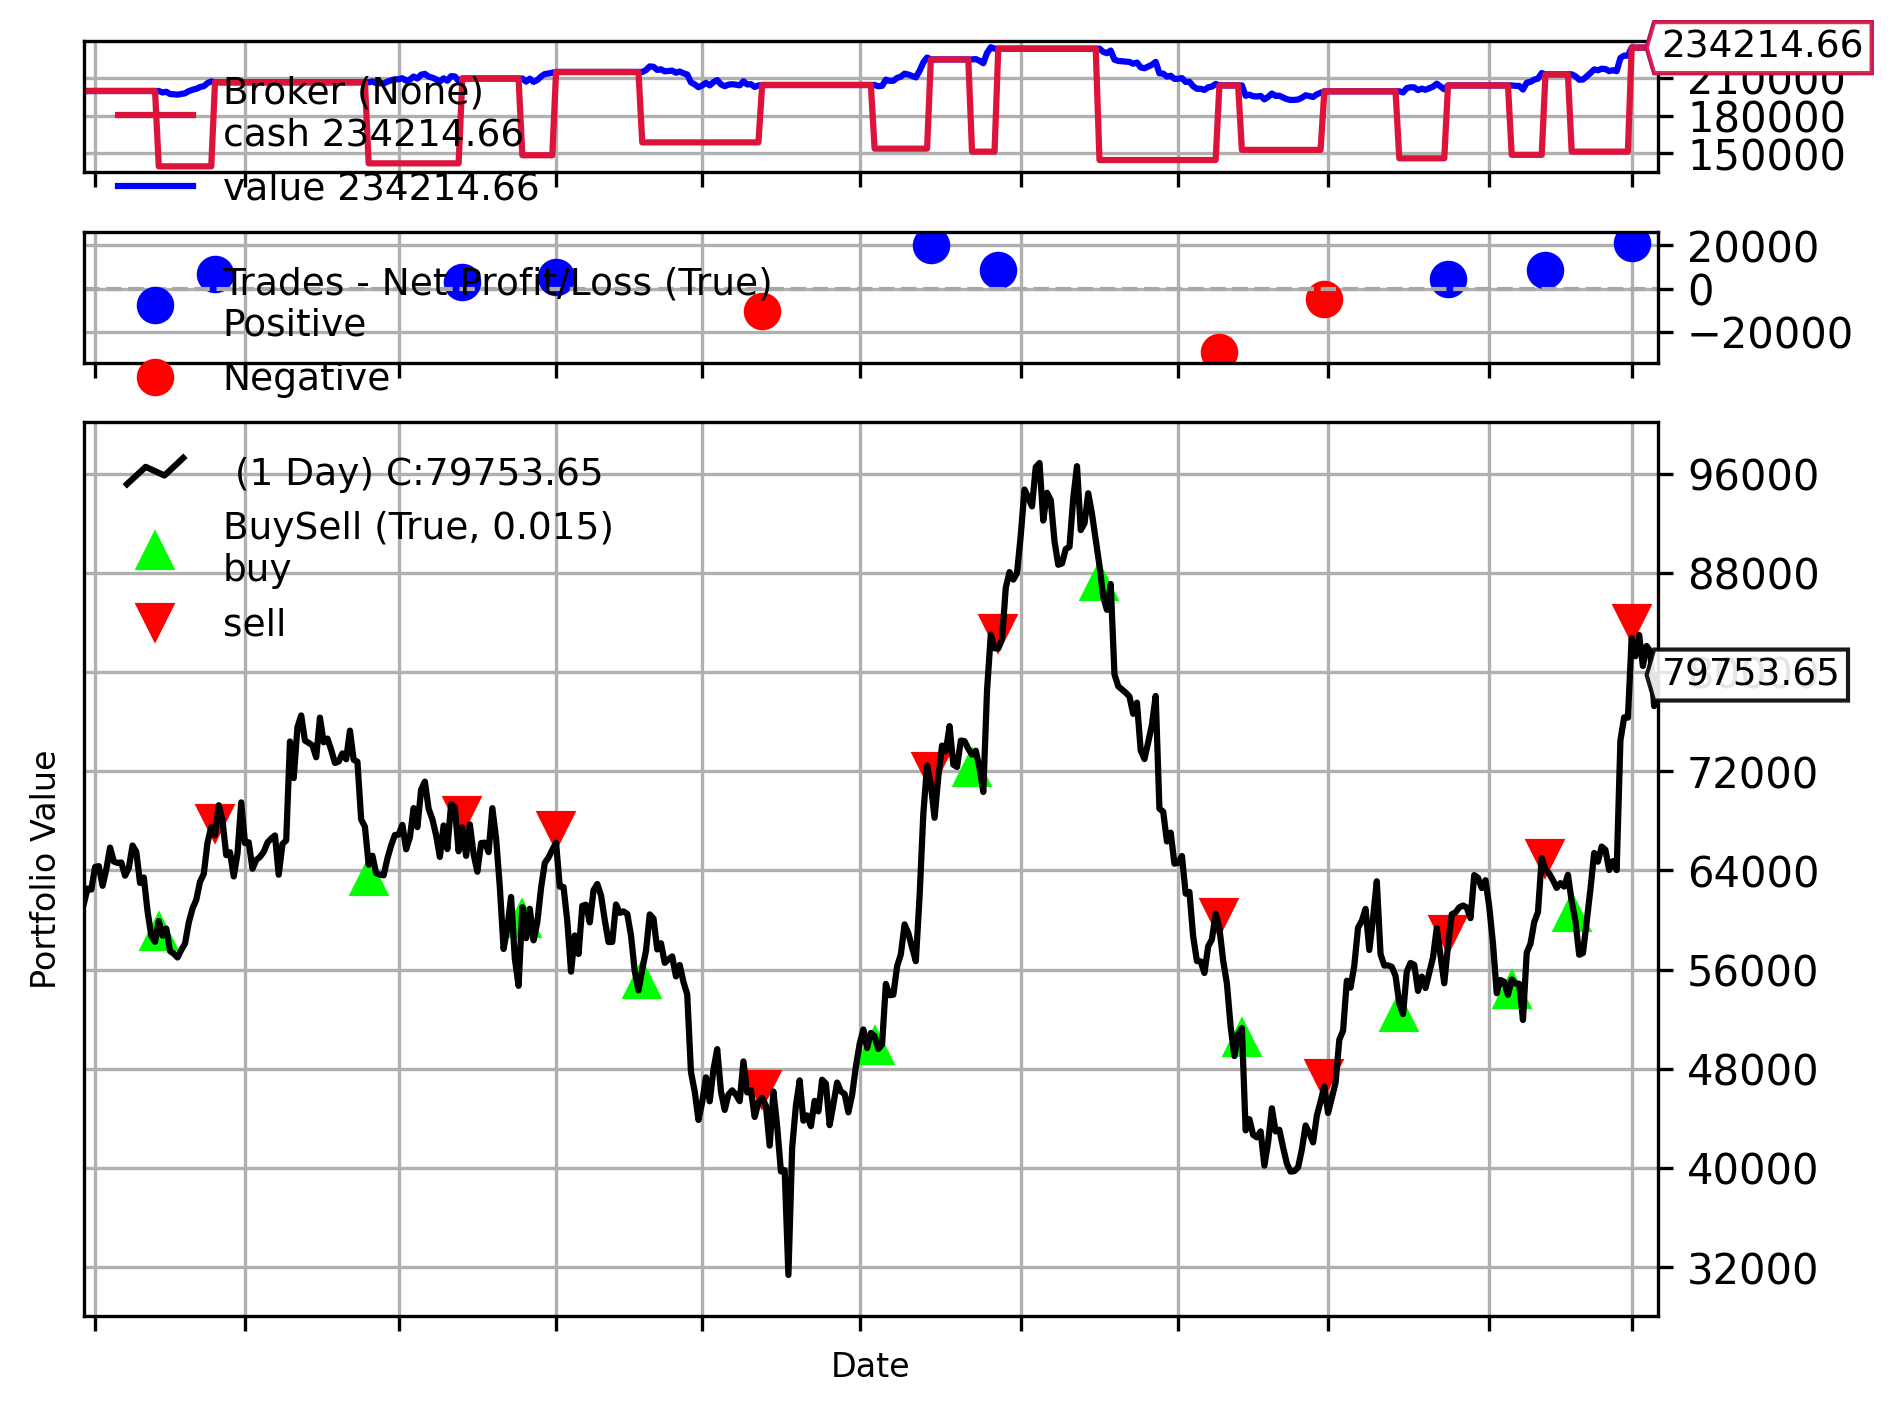

{'Total Return': '17.28%',
 'Average Daily Return': '0.0408%',
 'Sharpe Ratio': '0.84',
 'Max Drawdown': '17.87%',
 'Total Trades': '11',
 'Win Rate': '72.73%',
 'Avg Holding Period': '17.73 days'}

In [181]:
general_function('SBIN', 'SBILIFE', data, com=0, slipage=0, risk_free_rate=0)

100%|██████████| 421/421 [00:00<00:00, 19823.77it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

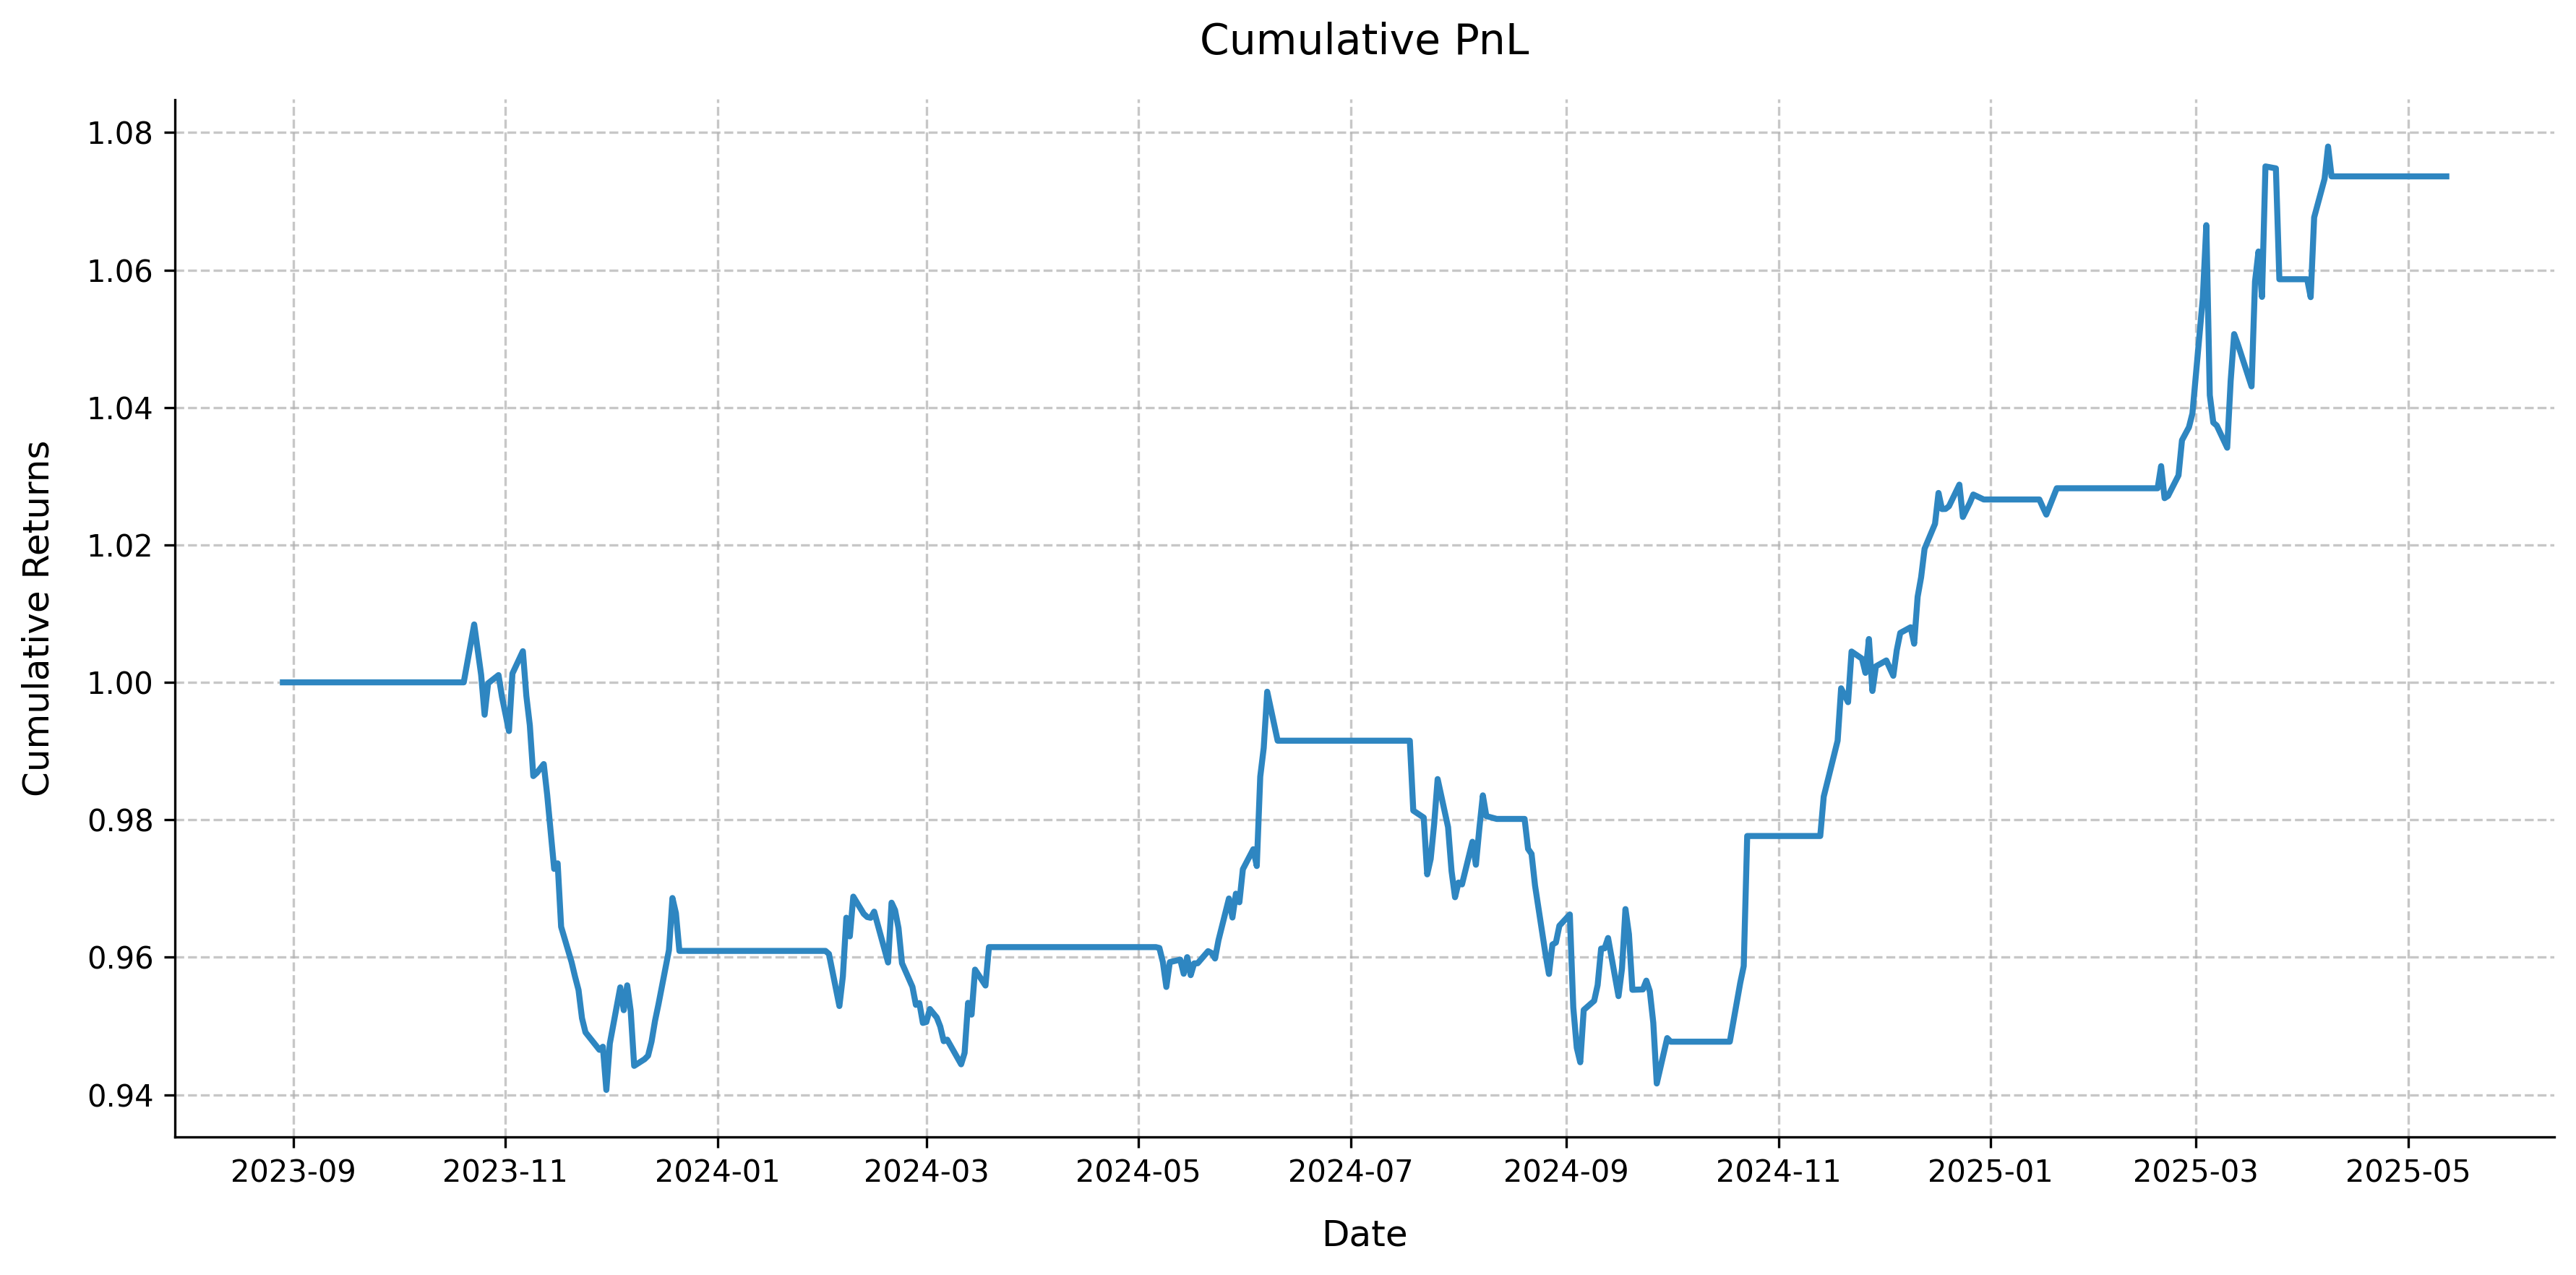

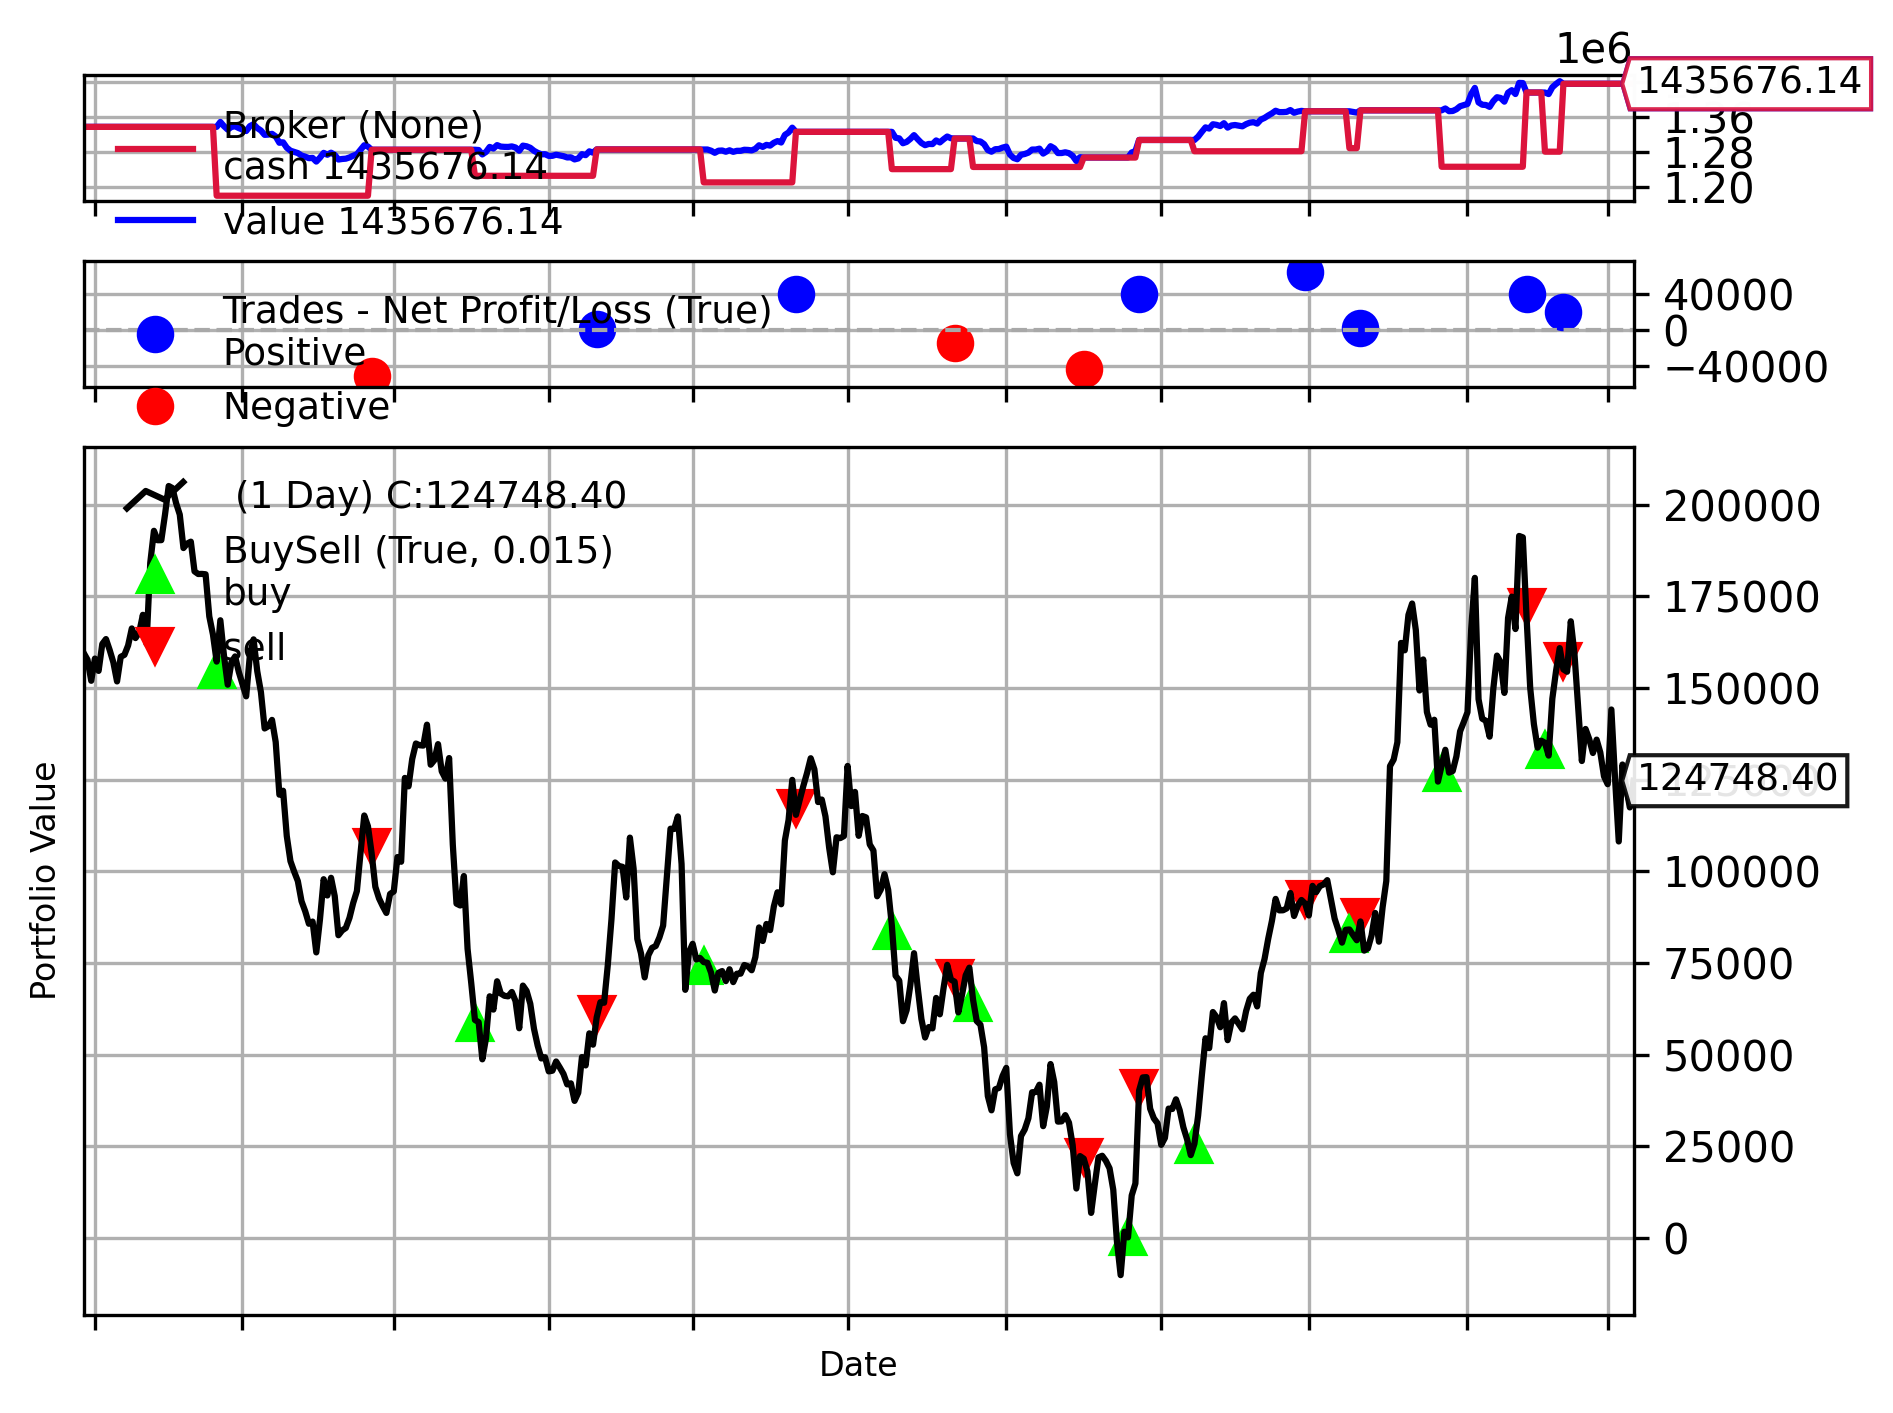

{'Total Return': '7.36%',
 'Average Daily Return': '0.0177%',
 'Sharpe Ratio': '0.70',
 'Max Drawdown': '6.72%',
 'Total Trades': '10',
 'Win Rate': '70.00%',
 'Avg Holding Period': '21.10 days'}

In [174]:
general_function('BAJFINANCE', 'BAJAJFINSV', data, com=0, slipage=0, risk_free_rate=0)

100%|██████████| 421/421 [00:00<00:00, 16004.44it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

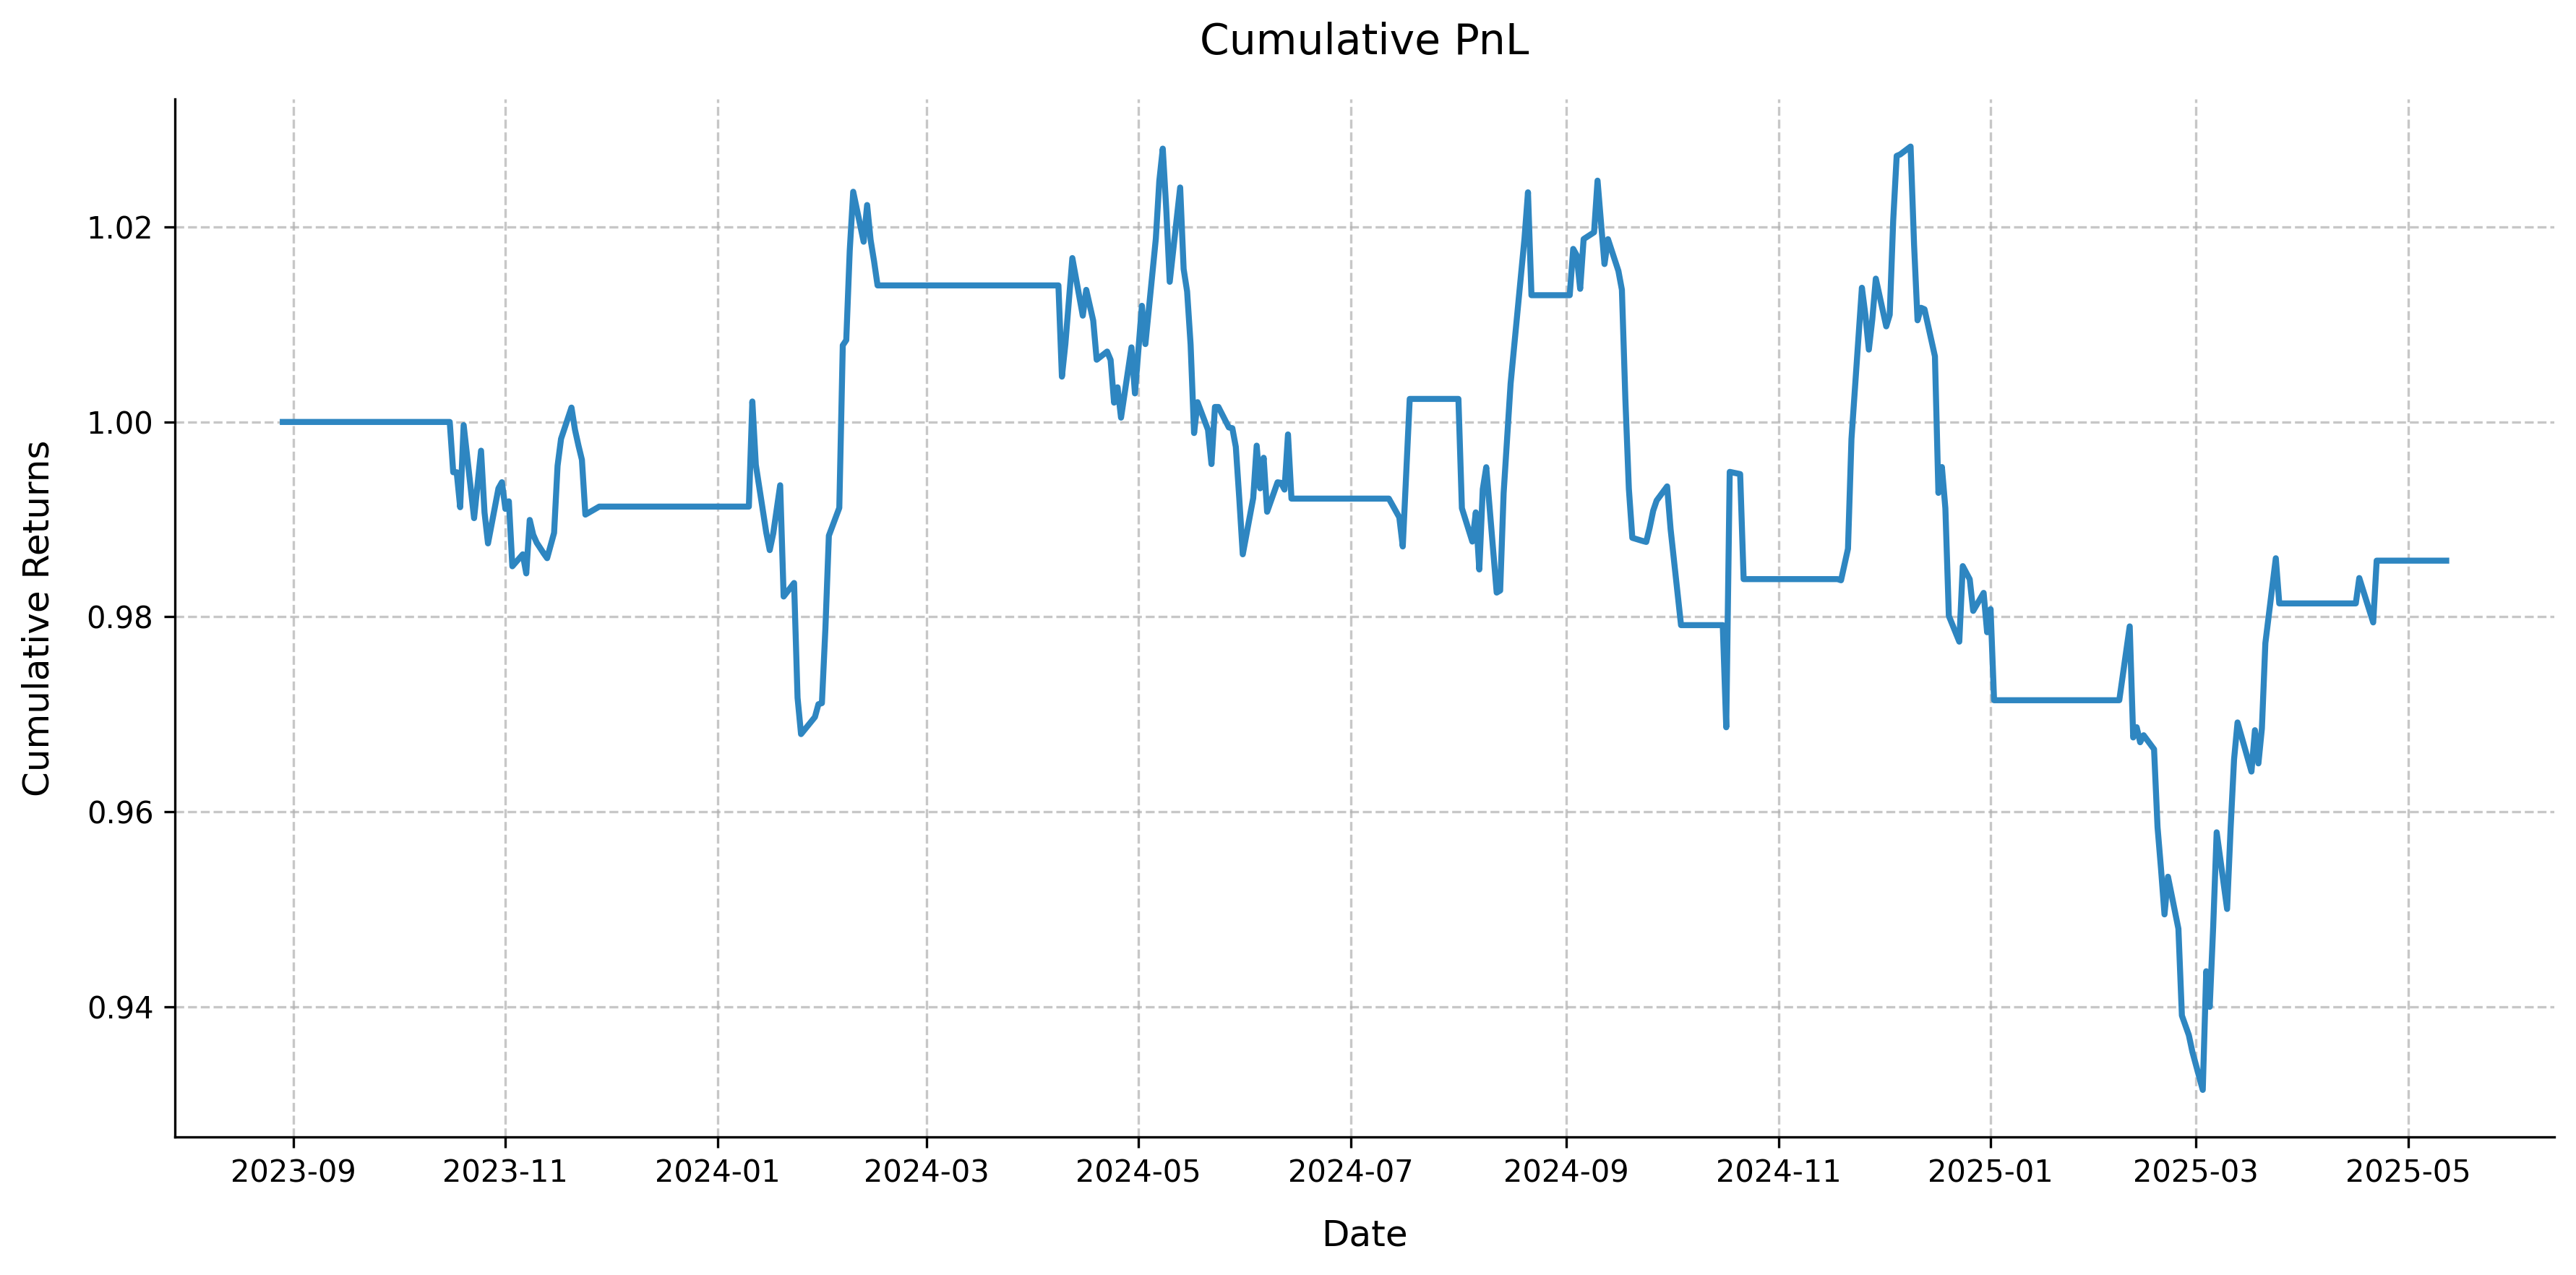

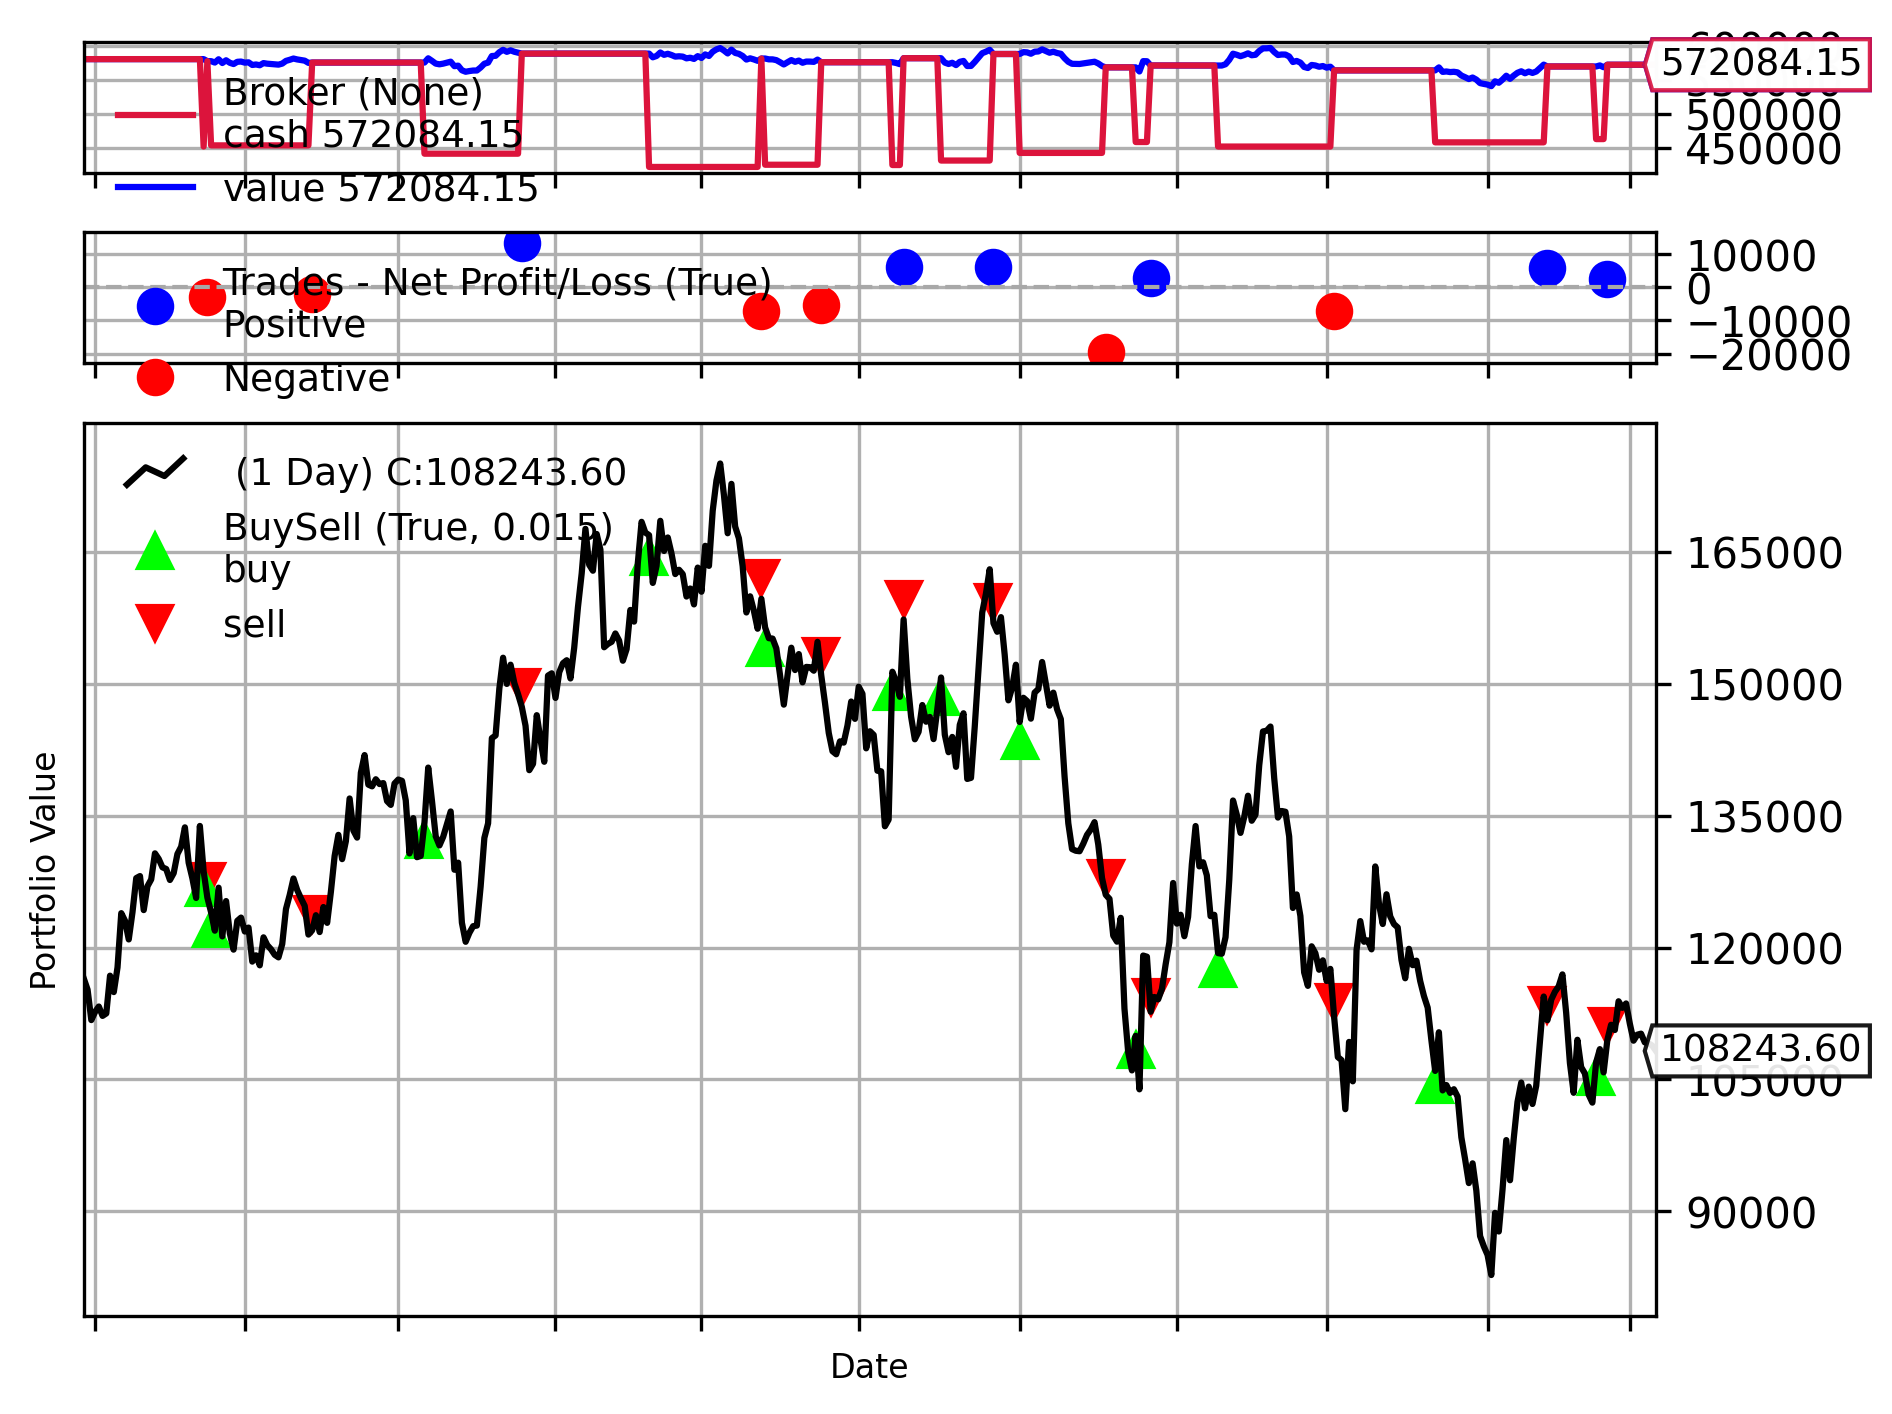

{'Total Return': '-1.42%',
 'Average Daily Return': '-0.0024%',
 'Sharpe Ratio': '-0.09',
 'Max Drawdown': '9.41%',
 'Total Trades': '12',
 'Win Rate': '50.00%',
 'Avg Holding Period': '17.25 days'}

In [175]:
general_function('INFY', 'TCS', data, com=0, slipage=0, risk_free_rate=0)

100%|██████████| 421/421 [00:00<00:00, 16135.77it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

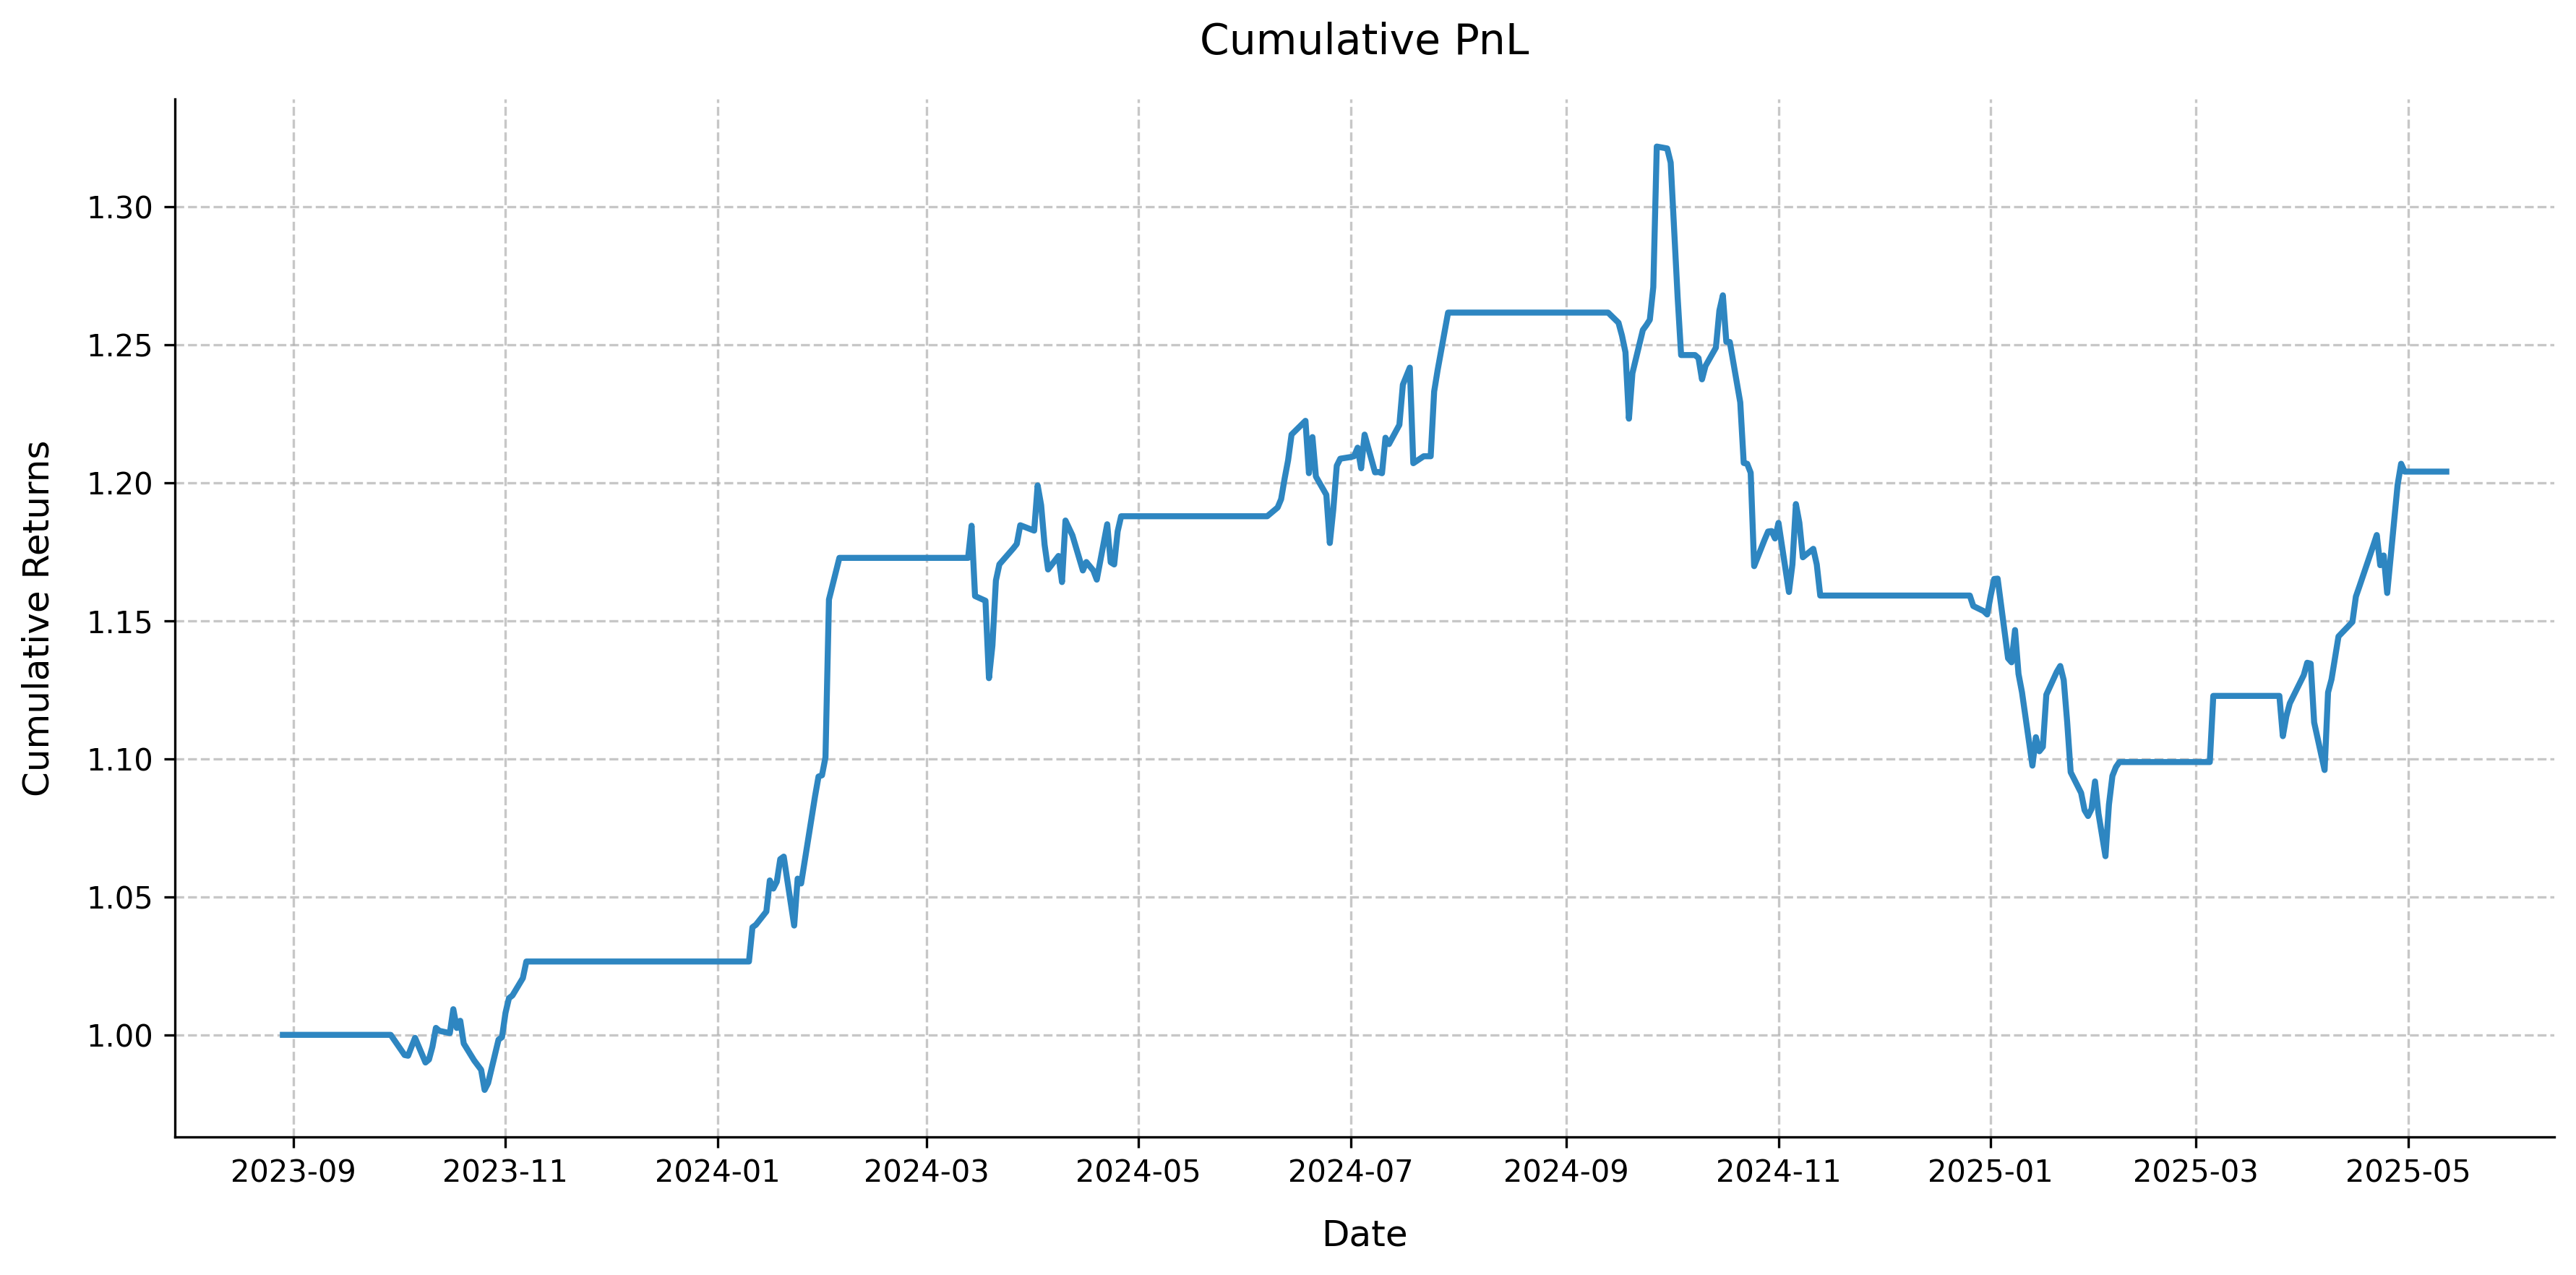

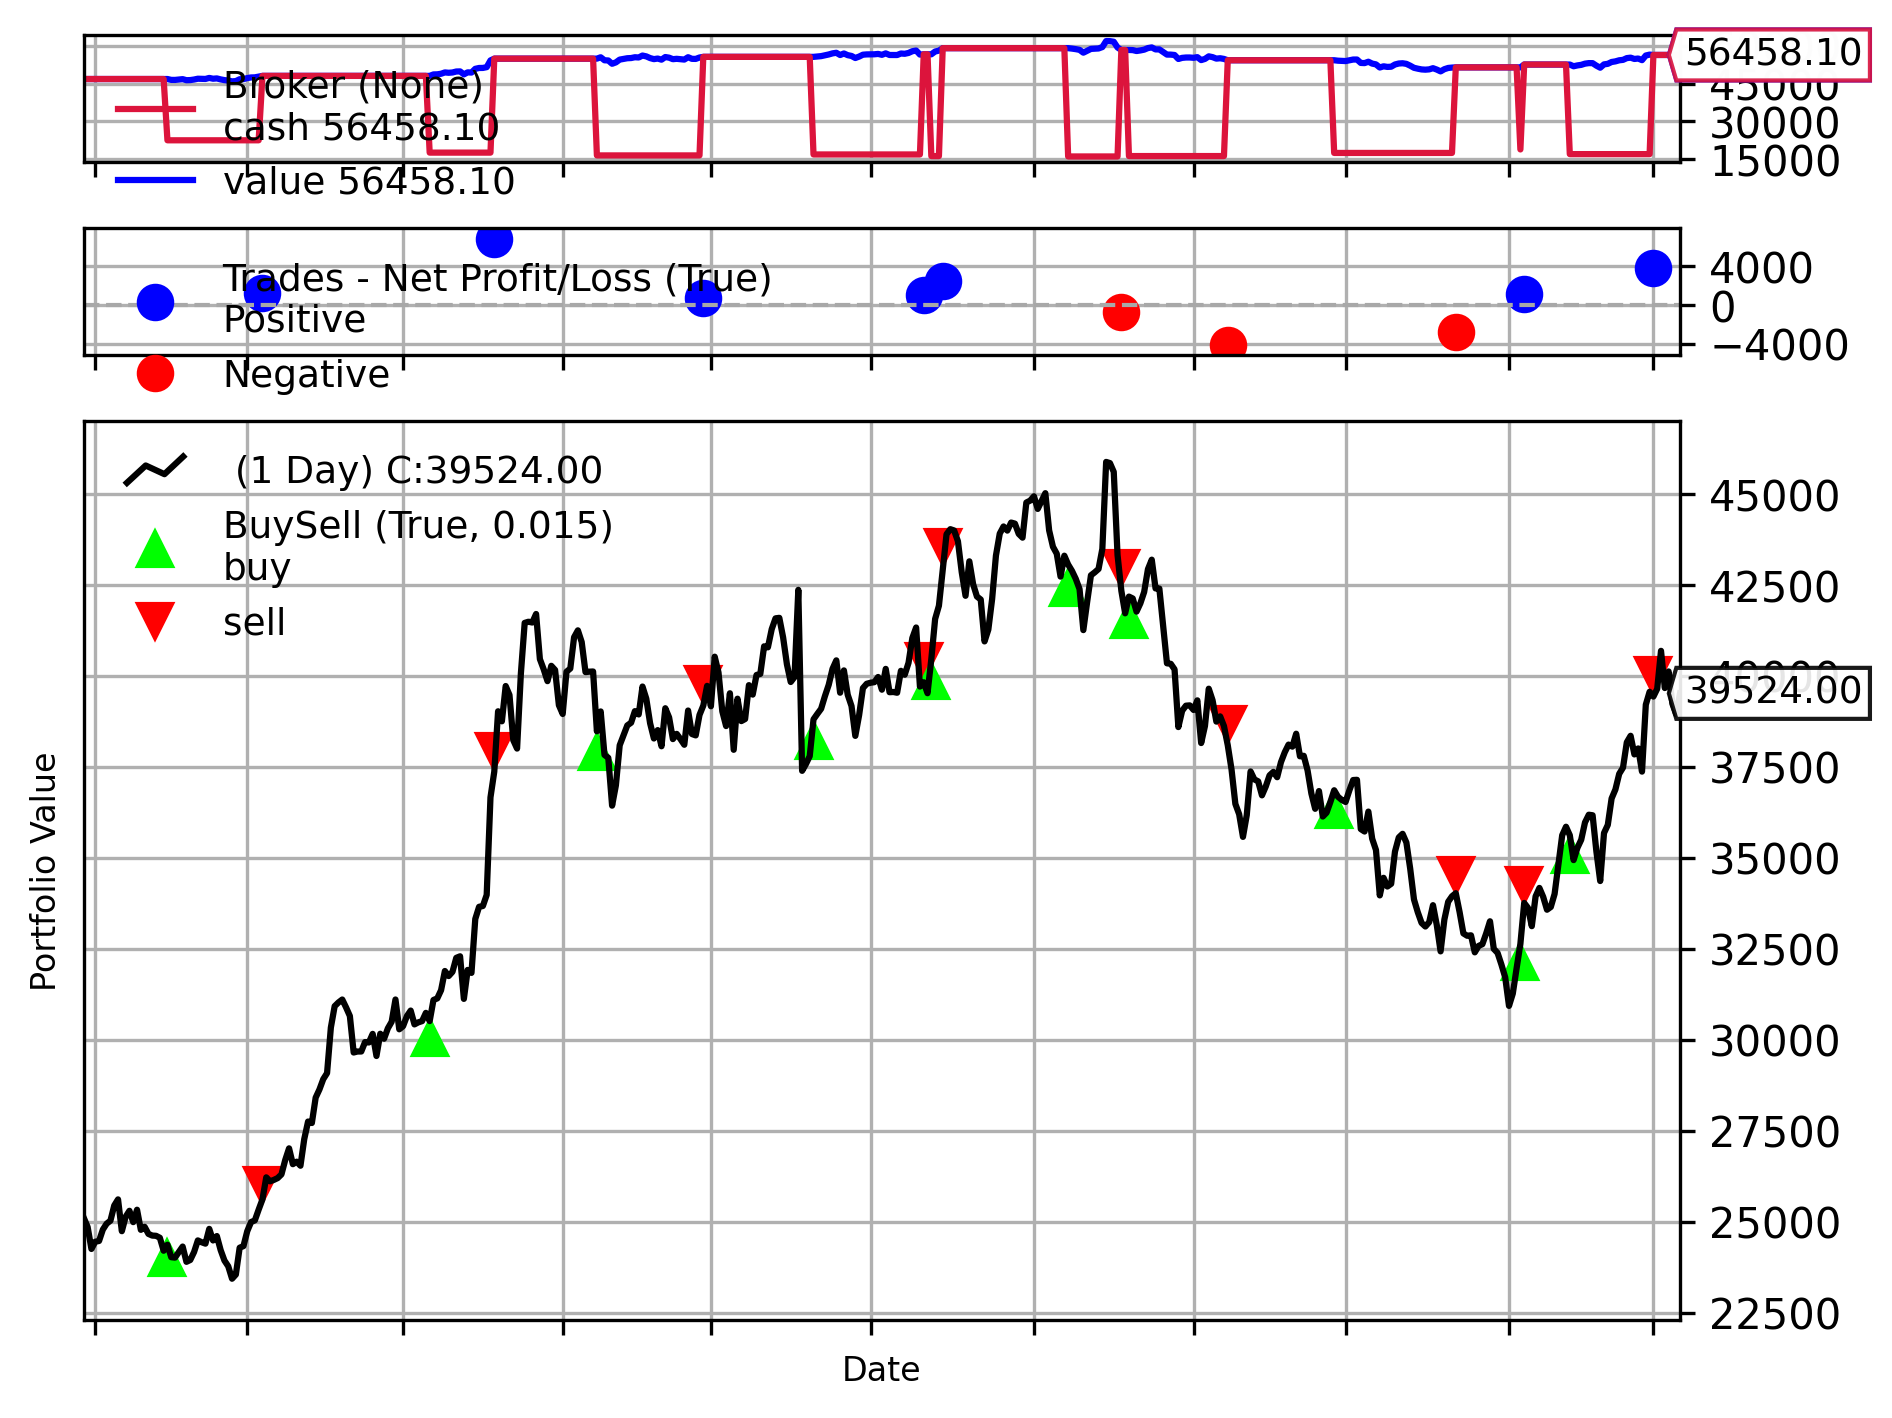

{'Total Return': '20.41%',
 'Average Daily Return': '0.0473%',
 'Sharpe Ratio': '0.94',
 'Max Drawdown': '19.46%',
 'Total Trades': '10',
 'Win Rate': '70.00%',
 'Avg Holding Period': '19.70 days'}

In [186]:
general_function('BPCL', 'RELIANCE', data, com=0, slipage=0, risk_free_rate=0)

100%|██████████| 421/421 [00:00<00:00, 19220.87it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

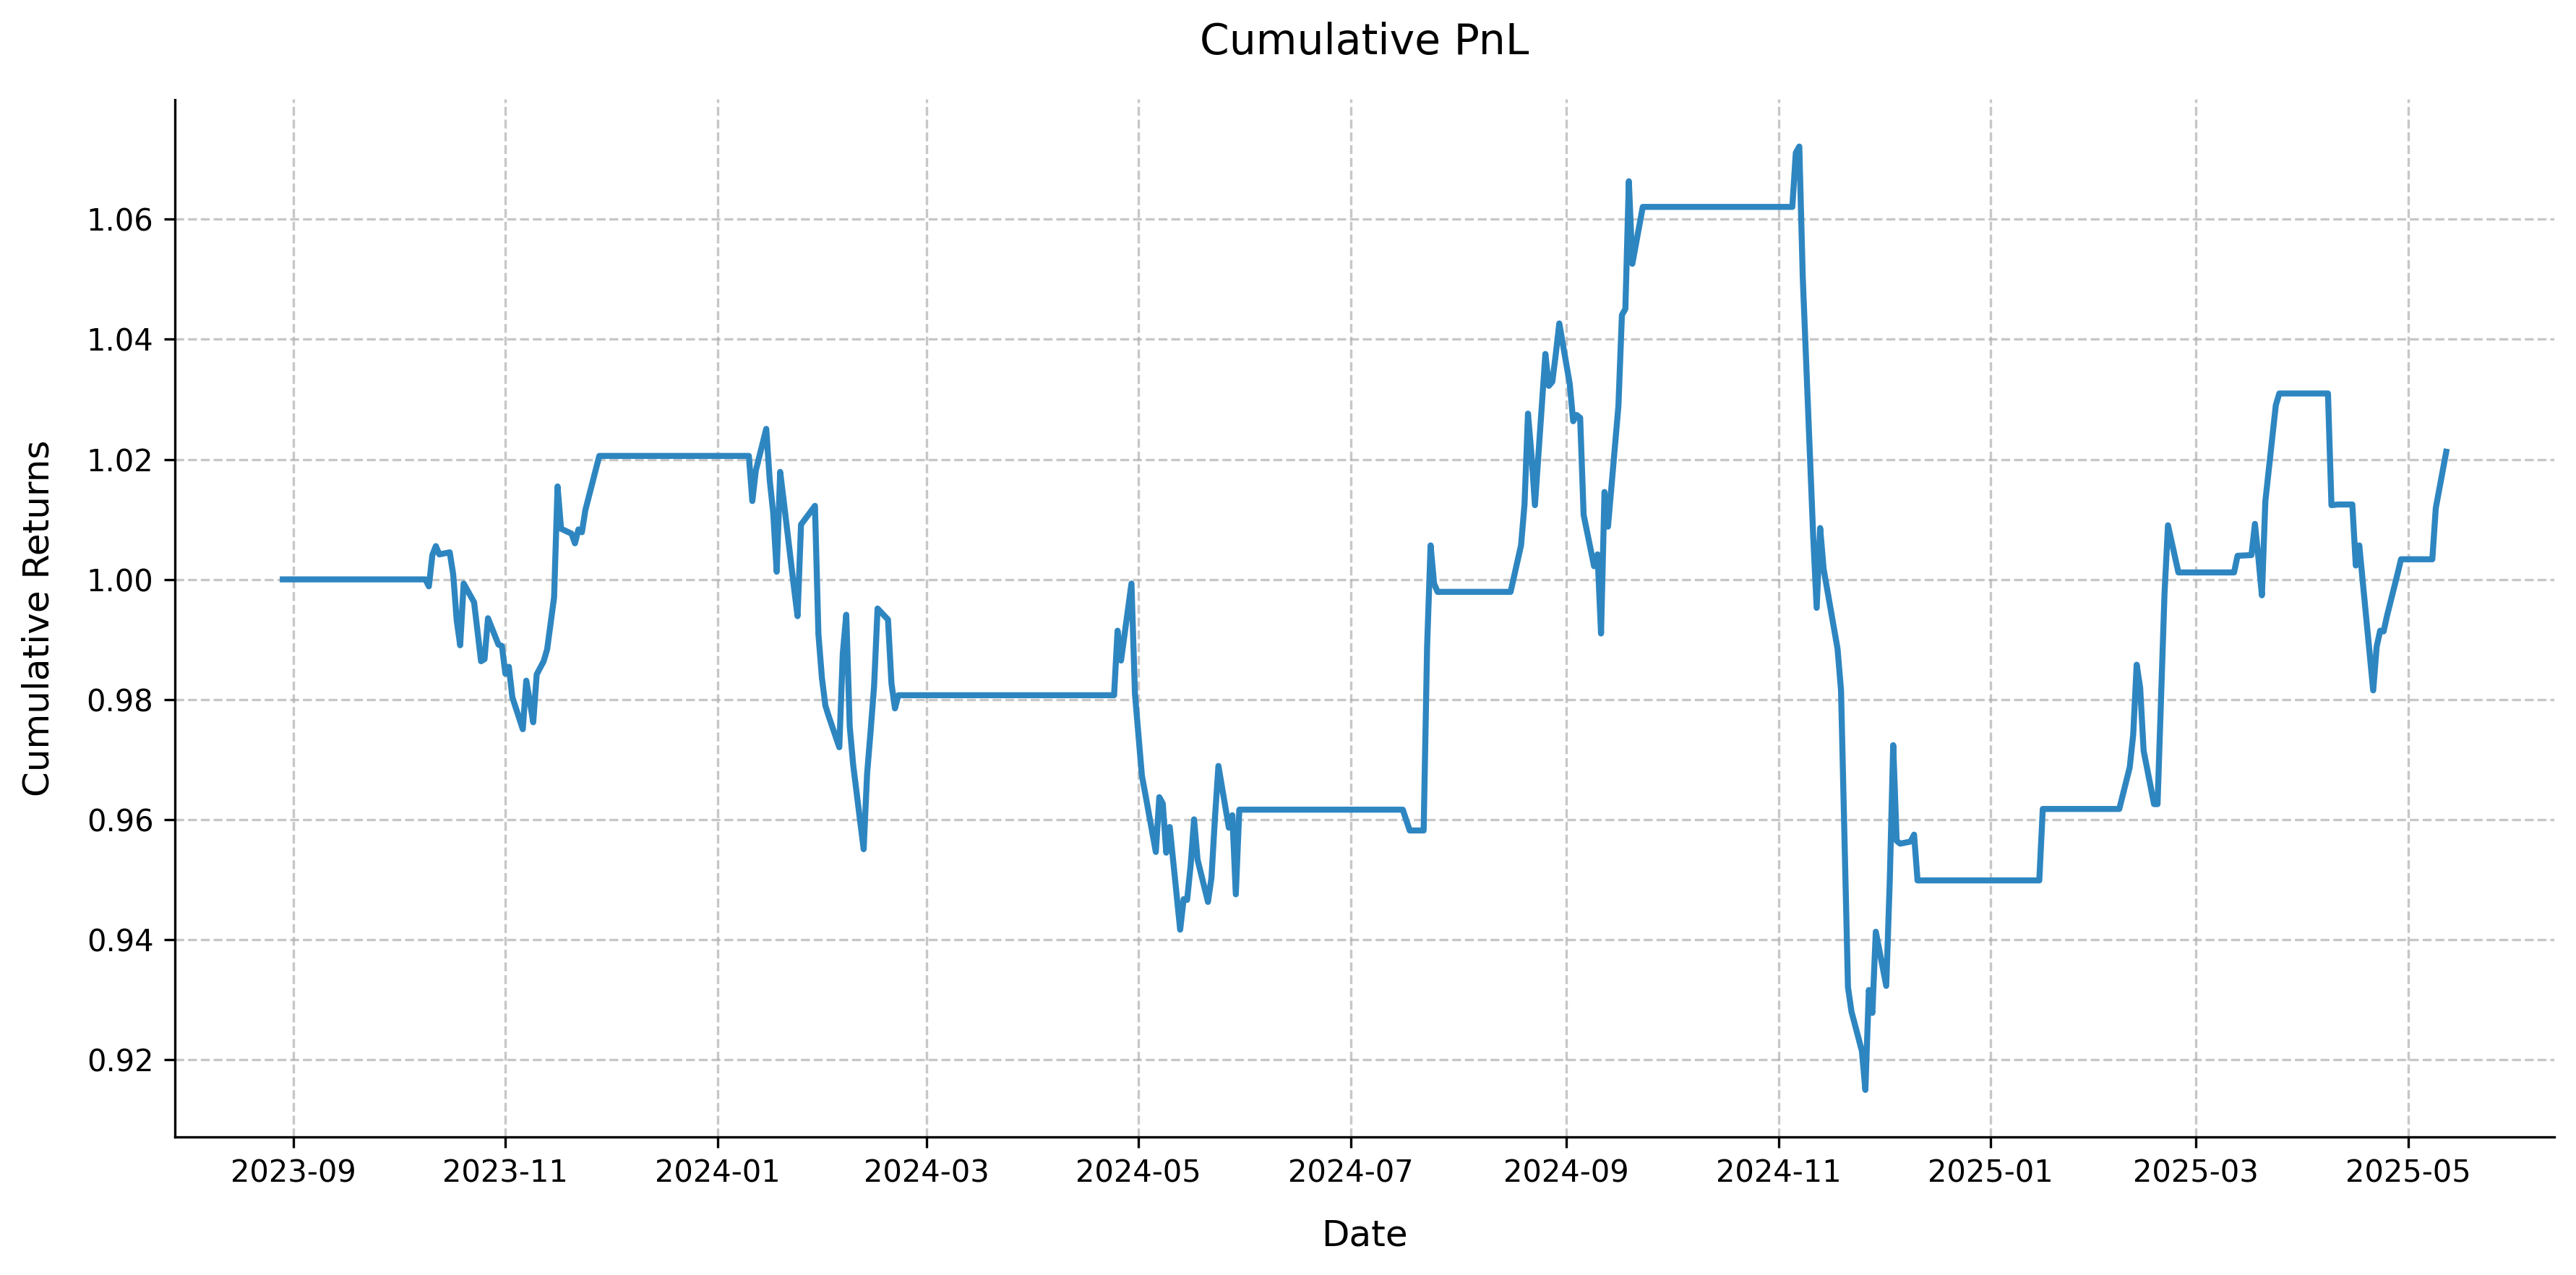

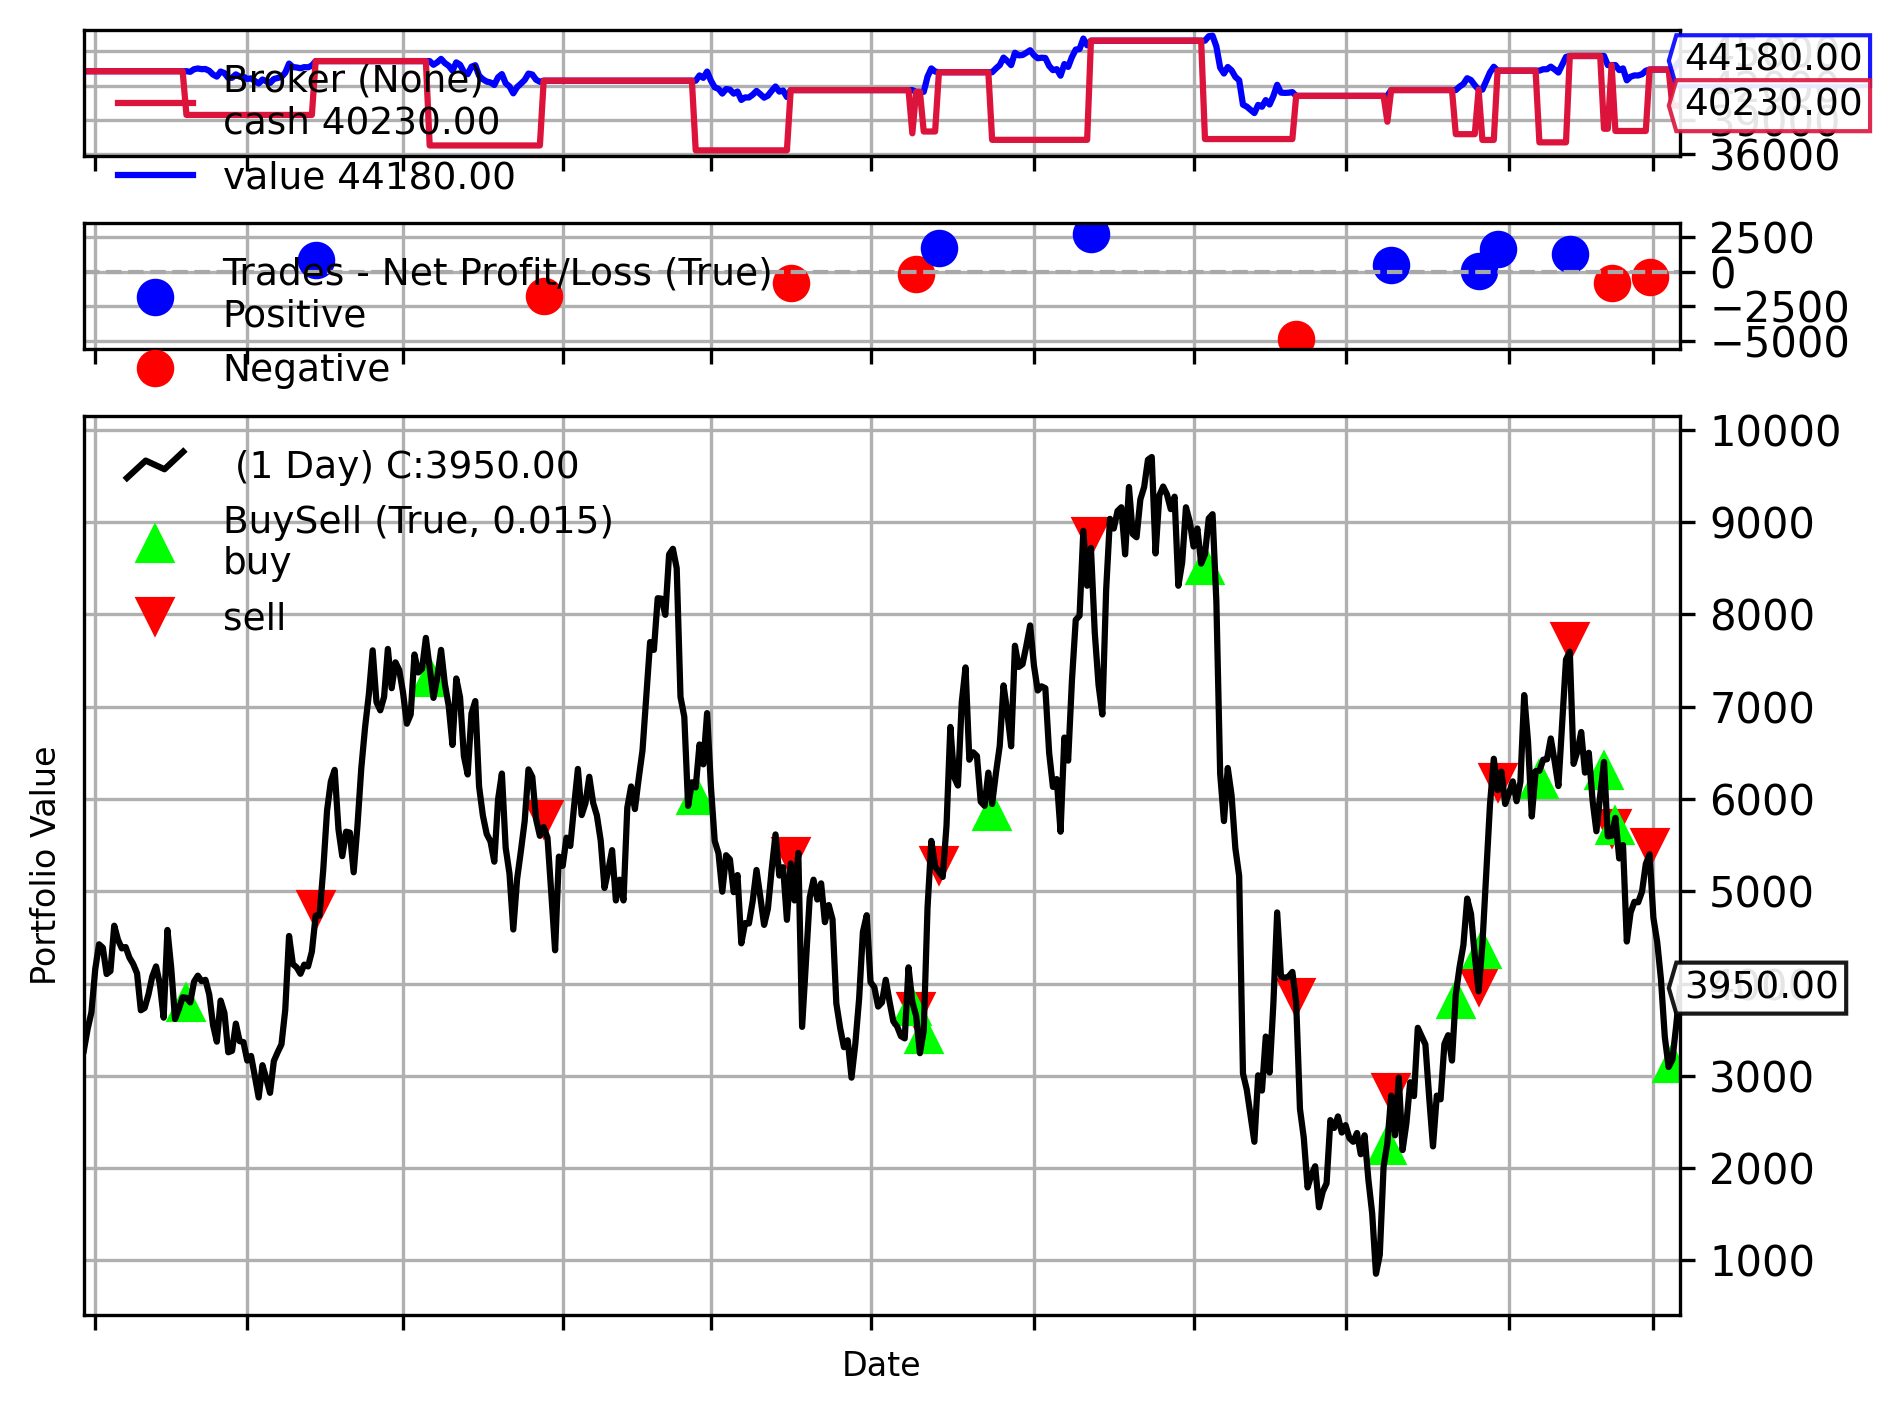

{'Total Return': '2.13%',
 'Average Daily Return': '0.0077%',
 'Sharpe Ratio': '0.17',
 'Max Drawdown': '14.66%',
 'Total Trades': '13',
 'Win Rate': '53.85%',
 'Avg Holding Period': '13.38 days'}

In [177]:
general_function('POWERGRID', 'NTPC', data, com=0, slipage=0, risk_free_rate=0)